# Compute metrics for Montserrat events, including creating SDS dayfiles if needed

In [1]:
import os
from importlib import reload
import pandas as pd
import sys
import obspy
sys.path.append('lib')
import dataframe_tools as DFT
import pipelines
reload(pipelines)
reload(DFT)
paths = {}
paths['DATA_DIR'] = os.path.join('/data')
paths['SDS_DIR'] = os.path.join(paths['DATA_DIR'], 'SDS')
paths['SAM_DIR'] = os.path.join(paths['DATA_DIR'], 'SAM')
paths['RESPONSE_DIR'] = os.path.join('data', 'responses')
print(paths)



MLcsvfile = '/home/thompsong/Developer/kitchensinkGT/PROJECTS/MVOcatalog/to_dataframes/mvo_catalog_stats.csv'
MLcat = pd.read_csv(MLcsvfile)
R = 5000 # approx distance of MBWH from "dome" source
MLcat['MLamp'] = DFT.local_magnitude(MLcat['peakamp']*1e-6, R)
MLcat['MLA'] = DFT.local_magnitude(MLcat['peakA']*1e-6, R)
MLcat['ME'] = DFT.energy_magnitude(MLcat['energy'])

{'DATA_DIR': '/data', 'SDS_DIR': '/data/SDS', 'SAM_DIR': '/data/SAM', 'RESPONSE_DIR': 'data/responses'}


<Axes: xlabel='MLA', ylabel='ME'>

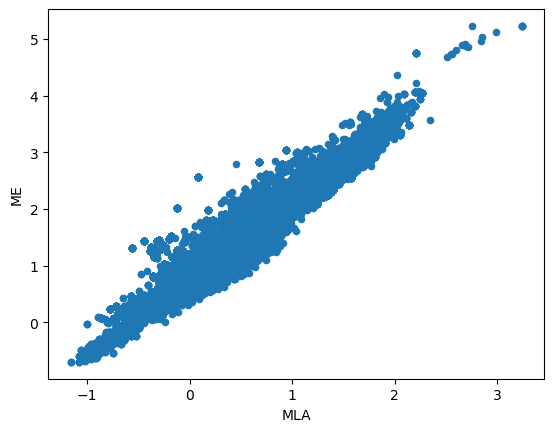

In [2]:
MLcat.plot.scatter(x='MLA', y='ME')

In [3]:
# Montserrat data from Seisan archive

## SCAFFOLD: THIS DOES NOT WORK PROPOERLY AS IT REPEATING EVENTS
seisandbdir =  '/data/SEISAN_DB/WAV/DSNC_'
net = 'MV'
invfile = os.path.join(paths['RESPONSE_DIR'],f"{net}.xml")
source = {'lat':16.71111, 'lon':-62.17722}
Ntry = 100
Nmin = 30
sampling_interval=2.56
catResultsDF = {}

#display(catResultsDF) 

subclasses = ['r', 'e', 'l', 'h', 't']
#subclasses = ['h', 't']
for subclass in subclasses:
    cat = MLcat[MLcat['subclass']==subclass]
    catResultsDF[subclass]=pd.DataFrame(columns=['Event', 'start', 'end', 'duration', 'ML', 'sum(ER)', 'ME', 'DR', 'DRS'])
    big = cat.nlargest(Ntry, 'ME')
    print(big)
    for i, row in big.iterrows():
        #print('\n', i, row, '\n')

        eventname = f"{subclass}_{row['filetime']}"
        startt = obspy.UTCDateTime(row['filetime'])
        endt = max([startt + min([row['trigger_duration'], 20]), obspy.UTCDateTime(row['offtime']) ] )
        print(f'Calling for data from {startt} to {endt}')

        # need to check SDS directory exists for this date, if not, we run the sausage to create it
        do_metric = {'SDS_RAW':True}   
        pipelines.big_sausage(seisandbdir, paths, startt, endt, \
                        sampling_interval=sampling_interval, \
                        source=source, \
                        invfile=invfile, \
                        Q=None, \
                        ext='pickle', \
                        dbout=None, \
                        net=net, do_metric=do_metric, MBWHZ_only=True)  
        
        print('Calling wrapper')
        DFT.wrapper(paths['SDS_DIR'], net, startt, endt, invfile, catResultsDF[subclass], eventname, source, sampling_interval=sampling_interval)
        if len(catResultsDF[subclass])==Nmin:
            break
        print('\n\n')
    print('\n\n****************')


print('\n\nDone\n')

       Unnamed: 0                     filetime     starttime    Fs  calib  \
21597         185  2002-08-13T03:26:53.000000Z  1.029209e+09  75.0    1.0   
22522         185  2002-08-13T03:26:53.000000Z  1.029209e+09  75.0    1.0   
23447         185  2002-08-13T03:26:53.000000Z  1.029209e+09  75.0    1.0   
26326         185  2002-08-13T03:26:53.000000Z  1.029209e+09  75.0    1.0   
29205         185  2002-08-13T03:26:53.000000Z  1.029209e+09  75.0    1.0   
...           ...                          ...           ...   ...    ...   
54650        9680  2003-05-30T13:13:57.000000Z  1.054300e+09  75.0    1.0   
64457        9680  2003-05-30T13:13:57.000000Z  1.054300e+09  75.0    1.0   
74264        9680  2003-05-30T13:13:57.000000Z  1.054300e+09  75.0    1.0   
84071        9680  2003-05-30T13:13:57.000000Z           NaN  75.0    1.0   
33017        3997  2003-01-09T21:25:32.000000Z  1.042148e+09  75.0    1.0   

       quality  medianF  peakF        peakA  bw_min  ...  coincidence_sum  

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:26:53.000000Z - 2002-08-13T03:28:35.986667Z | 75.0 Hz, 7725 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T03:26:53.000000Z to 2002-08-13T03:28:35.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T03:24:53.000000Z - 2002-08-13T03:30:35.986667Z | 75.0 Hz, 25725 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8972515151983903e-05, R=4555.50690594748, ML=-0.17
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.03e+08, Magnitude: 2.5
Network: Joules: 4.03e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2006-05-17T21:45:42.000000Z to 2006-05-17T21:46:36.440000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2006/AK/AUI/EHE.D/AK.AUI..EHE.D.2006.137")
st = read("/data/SDS/2006/AK/AUI/EHN.D/AK.AUI..EHN.D.2006.137")
st = read("/data/SDS/2006/AK/AUI/EHZ.D/AK.AUI..EHZ.D.2006.137")
st = read("/data/SDS/2006/AK/AUP/EHZ.D/AK.AUP..EHZ.D.2006.137")
st = read("/data/SDS/2006/AK/AUW/EHZ.D/AK.AUW..EHZ.D.2006.137")
st = read("/data/SDS/2006/AK/BAL/EHZ.D/AK.BAL..EHZ.D.2006.137")
st = read("/data/SDS/2006/AK/BGR/EHZ.D/AK.BGR..EHZ.D.2006.137")
st = read("/data/SDS/2006/AK/BKG/EHZ.D/AK.BKG..EHZ.D.2006.137")
st = read("/data/SDS/2006/AK/BMR/BHE.D/AK.BMR..BHE.D.2006.137")
st = read("/data/SDS/2006/AK/BMR/BHN.D/AK.BMR

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.7649949636088037e-05, R=4555.50690594748, ML=-0.38
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.55e+07, Magnitude: 2.1
Network: Joules: 8.55e+07, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.143")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:43:53.000000Z - 2003-05-23T07:45:38.666667Z | 75.0 Hz, 7926 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:41:53.000000Z - 2003-05-23T07:47:38.666666Z | 75.0 Hz, 25926 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.7649949636088037e-05, R=4555.50690594748, ML=-0.38
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.55e+07, Magnitude: 2.1
Network: Joules: 8.55e+07, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.143")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:43:53.000000Z - 2003-05-23T07:45:38.666667Z | 75.0 Hz, 7926 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:41:53.000000Z - 2003-05-23T07:47:38.666666Z | 75.0 Hz, 25926 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.7649949636088037e-05, R=4555.50690594748, ML=-0.38
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.55e+07, Magnitude: 2.1
Network: Joules: 8.55e+07, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.143")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:43:53.000000Z - 2003-05-23T07:45:38.666667Z | 75.0 Hz, 7926 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:41:53.000000Z - 2003-05-23T07:47:38.666666Z | 75.0 Hz, 25926 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.7649949636088037e-05, R=4555.50690594748, ML=-0.38
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.55e+07, Magnitude: 2.1
Network: Joules: 8.55e+07, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.143")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:43:53.000000Z - 2003-05-23T07:45:38.666667Z | 75.0 Hz, 7926 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-23T07:43:53.000000Z to 2003-05-23T07:45:38.666667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-23T07:41:53.000000Z - 2003-05-23T07:47:38.666666Z | 75.0 Hz, 25926 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.7649949636088037e-05, R=4555.50690594748, ML=-0.38
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.55e+07, Magnitude: 2.1
Network: Joules: 8.55e+07, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2000-03-20T22:34:54.040000Z to 2000-03-20T22:39:20.352010Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
0 Trace(s) in Stream:

2000-03-20T00:00:00.000000Z
- Found 0 files
[]
[]
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2000-03-20T22:34:54.040000Z to 2000-03-20T22:39:20.352010Z with 120 padding seconds
No data - will try loading miniseed files directly
Full day in SDS archive:
0 Trace(s) in Stream:

no data loaded for this event



Calling for data from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.148")
1 Tra

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.908587982850076e-06, R=4555.50690594748, ML=-0.63
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.45e+07, Magnitude: 2.0
Network: Joules: 5.45e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.148")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:40:13.000000Z - 2003-05-28T08:41:40.413333Z | 75.0 Hz, 6557 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:38:13.000000Z - 2003-05-28T08:43:40.413334Z | 75.0 Hz, 24557 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.908587982850076e-06, R=4555.50690594748, ML=-0.63
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.45e+07, Magnitude: 2.0
Network: Joules: 5.45e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.148")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:40:13.000000Z - 2003-05-28T08:41:40.413333Z | 75.0 Hz, 6557 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:38:13.000000Z - 2003-05-28T08:43:40.413334Z | 75.0 Hz, 24557 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.908587982850076e-06, R=4555.50690594748, ML=-0.63
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.45e+07, Magnitude: 2.0
Network: Joules: 5.45e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.148")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:40:13.000000Z - 2003-05-28T08:41:40.413333Z | 75.0 Hz, 6557 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:38:13.000000Z - 2003-05-28T08:43:40.413334Z | 75.0 Hz, 24557 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.908587982850076e-06, R=4555.50690594748, ML=-0.63
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.45e+07, Magnitude: 2.0
Network: Joules: 5.45e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.148")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:40:13.000000Z - 2003-05-28T08:41:40.413333Z | 75.0 Hz, 6557 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-28T08:40:13.000000Z to 2003-05-28T08:41:40.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-28T08:38:13.000000Z - 2003-05-28T08:43:40.413334Z | 75.0 Hz, 24557 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.908587982850076e-06, R=4555.50690594748, ML=-0.63
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.45e+07, Magnitude: 2.0
Network: Joules: 5.45e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.138")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:43:23.000000Z - 2003-05-18T00:44:52.013333Z | 75.0 Hz, 6677 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:41:23.000000Z - 2003-05-18T00:46:52.013333Z | 75.0 Hz, 24677 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.139205656165498e-06, R=4555.50690594748, ML=-0.67
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.08e+07, Magnitude: 1.9
Network: Joules: 4.08e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.138")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:43:23.000000Z - 2003-05-18T00:44:52.013333Z | 75.0 Hz, 6677 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:41:23.000000Z - 2003-05-18T00:46:52.013333Z | 75.0 Hz, 24677 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.139205656165498e-06, R=4555.50690594748, ML=-0.67
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.08e+07, Magnitude: 1.9
Network: Joules: 4.08e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.138")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:43:23.000000Z - 2003-05-18T00:44:52.013333Z | 75.0 Hz, 6677 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:41:23.000000Z - 2003-05-18T00:46:52.013333Z | 75.0 Hz, 24677 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.139205656165498e-06, R=4555.50690594748, ML=-0.67
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.08e+07, Magnitude: 1.9
Network: Joules: 4.08e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.138")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:43:23.000000Z - 2003-05-18T00:44:52.013333Z | 75.0 Hz, 6677 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:41:23.000000Z - 2003-05-18T00:46:52.013333Z | 75.0 Hz, 24677 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.139205656165498e-06, R=4555.50690594748, ML=-0.67
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.08e+07, Magnitude: 1.9
Network: Joules: 4.08e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.138")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:43:23.000000Z - 2003-05-18T00:44:52.013333Z | 75.0 Hz, 6677 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-18T00:43:23.000000Z to 2003-05-18T00:44:52.013333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-18T00:41:23.000000Z - 2003-05-18T00:46:52.013333Z | 75.0 Hz, 24677 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.139205656165498e-06, R=4555.50690594748, ML=-0.67
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.08e+07, Magnitude: 1.9
Network: Joules: 4.08e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.147")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:19:22.000000Z - 2003-05-27T15:21:02.346667Z | 75.0 Hz, 7527 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:17:22.000000Z - 2003-05-27T15:23:02.346666Z | 75.0 Hz, 25527 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.056789894805546e-06, R=4555.50690594748, ML=-1.6
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.80e+05, Magnitude: 0.3
Network: Joules: 1.80e+05, Magnitude: 0.3
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.147")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:19:22.000000Z - 2003-05-27T15:21:02.346667Z | 75.0 Hz, 7527 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:17:22.000000Z - 2003-05-27T15:23:02.346666Z | 75.0 Hz, 25527 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.056789894805546e-06, R=4555.50690594748, ML=-1.6
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.80e+05, Magnitude: 0.3
Network: Joules: 1.80e+05, Magnitude: 0.3
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.147")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:19:22.000000Z - 2003-05-27T15:21:02.346667Z | 75.0 Hz, 7527 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:17:22.000000Z - 2003-05-27T15:23:02.346666Z | 75.0 Hz, 25527 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.056789894805546e-06, R=4555.50690594748, ML=-1.6
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.80e+05, Magnitude: 0.3
Network: Joules: 1.80e+05, Magnitude: 0.3
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.147")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:19:22.000000Z - 2003-05-27T15:21:02.346667Z | 75.0 Hz, 7527 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:17:22.000000Z - 2003-05-27T15:23:02.346666Z | 75.0 Hz, 25527 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.056789894805546e-06, R=4555.50690594748, ML=-1.6
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.80e+05, Magnitude: 0.3
Network: Joules: 1.80e+05, Magnitude: 0.3
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.147")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:19:22.000000Z - 2003-05-27T15:21:02.346667Z | 75.0 Hz, 7527 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-27T15:19:22.000000Z to 2003-05-27T15:21:02.346667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27T15:17:22.000000Z - 2003-05-27T15:23:02.346666Z | 75.0 Hz, 25527 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-27

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.056789894805546e-06, R=4555.50690594748, ML=-1.6
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.80e+05, Magnitude: 0.3
Network: Joules: 1.80e+05, Magnitude: 0.3
Computing body-wave DR
Computing surface-wave DRS


****************
       Unnamed: 0                     filetime     starttime    Fs  calib  \
44881        9718  2003-05-30T23:20:35.000000Z  1.054337e+09  75.0    1.0   
54688        9718  2003-05-30T23:20:35.000000Z  1.054337e+09  75.0    1.0   
64495        9718  2003-05-30T23:20:35.000000Z  1.054337e+09  75.0    1.0   
74302        9718  2003-05-30T23:20:35.000000Z  1.054337e+09  75.0    1.0   
84109        9718  2003-05-30T23:20:35.000000Z           NaN  75.0    1.0   
...           ...                          ...           ...   ...    ...   
64148        9371  2003-05-26T17:52:29.000000Z  1.053972e+09  75.0    1.0   
73639        9055  2003-05-22T17:47:20.000000Z  1.053626e+09  75.0    1.0   
73955        9371  2003-05-26T17:52:29.000000Z  1.053972e+09  75.0    1.

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3751378397130076e-05, R=4555.50690594748, ML=-0.49
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e+08, Magnitude: 2.1
Network: Joules: 1.07e+08, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:20:35.000000Z - 2003-05-30T23:22:45.720000Z | 75.0 Hz, 9805 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:18:35.000000Z - 2003-05-30T23:24:45.720000Z | 75.0 Hz, 27805 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3751378397130076e-05, R=4555.50690594748, ML=-0.49
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e+08, Magnitude: 2.1
Network: Joules: 1.07e+08, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:20:35.000000Z - 2003-05-30T23:22:45.720000Z | 75.0 Hz, 9805 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:18:35.000000Z - 2003-05-30T23:24:45.720000Z | 75.0 Hz, 27805 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3751378397130076e-05, R=4555.50690594748, ML=-0.49
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e+08, Magnitude: 2.1
Network: Joules: 1.07e+08, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:20:35.000000Z - 2003-05-30T23:22:45.720000Z | 75.0 Hz, 9805 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:18:35.000000Z - 2003-05-30T23:24:45.720000Z | 75.0 Hz, 27805 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3751378397130076e-05, R=4555.50690594748, ML=-0.49
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e+08, Magnitude: 2.1
Network: Joules: 1.07e+08, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:20:35.000000Z - 2003-05-30T23:22:45.720000Z | 75.0 Hz, 9805 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T23:20:35.000000Z to 2003-05-30T23:22:45.720000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T23:18:35.000000Z - 2003-05-30T23:24:45.720000Z | 75.0 Hz, 27805 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3751378397130076e-05, R=4555.50690594748, ML=-0.49
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e+08, Magnitude: 2.1
Network: Joules: 1.07e+08, Magnitude: 2.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-29T12:13:23.000000Z - 2003-01-29T12:14:41.560000Z | 75.0 Hz, 5893 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z with 120 padding seconds
Flat waveform: removing MV.MBWH..SHZ
No data - will try loading miniseed files directly
('MV', 'MBWH', '', 'SHZ'), /data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029, exists=1, availability=1.0
-rw-rw-r-- 1 thompsong thompsong 4022272 Apr 29 11:04

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.09804084134416e-26, R=4555.50690594748, ML=-21.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e-34, Magnitude: -25.9
Network: Joules: 1.07e-34, Magnitude: -25.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-29T12:13:23.000000Z - 2003-01-29T12:14:41.560000Z | 75.0 Hz, 5893 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z with 120 padding seconds
Flat waveform: removing MV.MBWH..SHZ
No data - will try loading miniseed files directly
('MV', 'MBWH', '', 'SHZ'), /data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029, exists=1, availability=1.0
-rw-rw-r-- 1 thompsong thompsong 4022272 Apr 29 11

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.09804084134416e-26, R=4555.50690594748, ML=-21.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e-34, Magnitude: -25.9
Network: Joules: 1.07e-34, Magnitude: -25.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-29T12:13:23.000000Z - 2003-01-29T12:14:41.560000Z | 75.0 Hz, 5893 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z with 120 padding seconds
Flat waveform: removing MV.MBWH..SHZ
No data - will try loading miniseed files directly
('MV', 'MBWH', '', 'SHZ'), /data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029, exists=1, availability=1.0
-rw-rw-r-- 1 thompsong thompsong 4022272 Apr 29 11

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.09804084134416e-26, R=4555.50690594748, ML=-21.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e-34, Magnitude: -25.9
Network: Joules: 1.07e-34, Magnitude: -25.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-29T12:13:23.000000Z - 2003-01-29T12:14:41.560000Z | 75.0 Hz, 5893 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z with 120 padding seconds
Flat waveform: removing MV.MBWH..SHZ
No data - will try loading miniseed files directly
('MV', 'MBWH', '', 'SHZ'), /data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029, exists=1, availability=1.0
-rw-rw-r-- 1 thompsong thompsong 4022272 Apr 29 11

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.09804084134416e-26, R=4555.50690594748, ML=-21.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e-34, Magnitude: -25.9
Network: Joules: 1.07e-34, Magnitude: -25.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-29T12:13:23.000000Z - 2003-01-29T12:14:41.560000Z | 75.0 Hz, 5893 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z with 120 padding seconds
Flat waveform: removing MV.MBWH..SHZ
No data - will try loading miniseed files directly
('MV', 'MBWH', '', 'SHZ'), /data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029, exists=1, availability=1.0
-rw-rw-r-- 1 thompsong thompsong 4022272 Apr 29 11

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.09804084134416e-26, R=4555.50690594748, ML=-21.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e-34, Magnitude: -25.9
Network: Joules: 1.07e-34, Magnitude: -25.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-29T12:13:23.000000Z - 2003-01-29T12:14:41.560000Z | 75.0 Hz, 5893 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-29T12:13:23.000000Z to 2003-01-29T12:14:41.560000Z with 120 padding seconds
Flat waveform: removing MV.MBWH..SHZ
No data - will try loading miniseed files directly
('MV', 'MBWH', '', 'SHZ'), /data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.029, exists=1, availability=1.0
-rw-rw-r-- 1 thompsong thompsong 4022272 Apr 29 11

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.09804084134416e-26, R=4555.50690594748, ML=-21.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e-34, Magnitude: -25.9
Network: Joules: 1.07e-34, Magnitude: -25.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:53:40.000000Z - 2003-05-24T00:55:23.853333Z | 75.0 Hz, 7790 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:51:40.000000Z - 2003-05-24T00:57:23.853333Z | 75.0 Hz, 25790 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.996077307312025e-06, R=4555.50690594748, ML=-1.15
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.58e+06, Magnitude: 1.4
Network: Joules: 7.58e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:53:40.000000Z - 2003-05-24T00:55:23.853333Z | 75.0 Hz, 7790 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:51:40.000000Z - 2003-05-24T00:57:23.853333Z | 75.0 Hz, 25790 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.996077307312025e-06, R=4555.50690594748, ML=-1.15
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.58e+06, Magnitude: 1.4
Network: Joules: 7.58e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:53:40.000000Z - 2003-05-24T00:55:23.853333Z | 75.0 Hz, 7790 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:51:40.000000Z - 2003-05-24T00:57:23.853333Z | 75.0 Hz, 25790 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.996077307312025e-06, R=4555.50690594748, ML=-1.15
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.58e+06, Magnitude: 1.4
Network: Joules: 7.58e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:53:40.000000Z - 2003-05-24T00:55:23.853333Z | 75.0 Hz, 7790 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:51:40.000000Z - 2003-05-24T00:57:23.853333Z | 75.0 Hz, 25790 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.996077307312025e-06, R=4555.50690594748, ML=-1.15
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.58e+06, Magnitude: 1.4
Network: Joules: 7.58e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:53:40.000000Z - 2003-05-24T00:55:23.853333Z | 75.0 Hz, 7790 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-24T00:53:40.000000Z to 2003-05-24T00:55:23.853333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-24T00:51:40.000000Z - 2003-05-24T00:57:23.853333Z | 75.0 Hz, 25790 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.996077307312025e-06, R=4555.50690594748, ML=-1.15
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.58e+06, Magnitude: 1.4
Network: Joules: 7.58e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:59:30.000000Z - 2003-05-25T08:01:03.373333Z | 75.0 Hz, 7004 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:57:30.000000Z - 2003-05-25T08:03:03.373333Z | 75.0 Hz, 25004 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.373338353446536e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.59e+06, Magnitude: 1.4
Network: Joules: 9.59e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:03:39.000000Z - 2003-05-30T03:05:17.080000Z | 75.0 Hz, 7357 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:01:39.000000Z - 2003-05-30T03:07:17.080000Z | 75.0 Hz, 25357 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.034620555935844e-06, R=4555.50690594748, ML=-0.93
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.04e+07, Magnitude: 1.5
Network: Joules: 1.04e+07, Magnitude: 1.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:59:30.000000Z - 2003-05-25T08:01:03.373333Z | 75.0 Hz, 7004 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:57:30.000000Z - 2003-05-25T08:03:03.373333Z | 75.0 Hz, 25004 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.373338353446536e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.59e+06, Magnitude: 1.4
Network: Joules: 9.59e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:03:39.000000Z - 2003-05-30T03:05:17.080000Z | 75.0 Hz, 7357 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:01:39.000000Z - 2003-05-30T03:07:17.080000Z | 75.0 Hz, 25357 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.034620555935844e-06, R=4555.50690594748, ML=-0.93
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.04e+07, Magnitude: 1.5
Network: Joules: 1.04e+07, Magnitude: 1.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:59:30.000000Z - 2003-05-25T08:01:03.373333Z | 75.0 Hz, 7004 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:57:30.000000Z - 2003-05-25T08:03:03.373333Z | 75.0 Hz, 25004 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.373338353446536e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.59e+06, Magnitude: 1.4
Network: Joules: 9.59e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:03:39.000000Z - 2003-05-30T03:05:17.080000Z | 75.0 Hz, 7357 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:01:39.000000Z - 2003-05-30T03:07:17.080000Z | 75.0 Hz, 25357 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.034620555935844e-06, R=4555.50690594748, ML=-0.93
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.04e+07, Magnitude: 1.5
Network: Joules: 1.04e+07, Magnitude: 1.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:59:30.000000Z - 2003-05-25T08:01:03.373333Z | 75.0 Hz, 7004 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:57:30.000000Z - 2003-05-25T08:03:03.373333Z | 75.0 Hz, 25004 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.373338353446536e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.59e+06, Magnitude: 1.4
Network: Joules: 9.59e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:03:39.000000Z - 2003-05-30T03:05:17.080000Z | 75.0 Hz, 7357 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:01:39.000000Z - 2003-05-30T03:07:17.080000Z | 75.0 Hz, 25357 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.034620555935844e-06, R=4555.50690594748, ML=-0.93
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.04e+07, Magnitude: 1.5
Network: Joules: 1.04e+07, Magnitude: 1.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:59:30.000000Z - 2003-05-25T08:01:03.373333Z | 75.0 Hz, 7004 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T07:59:30.000000Z to 2003-05-25T08:01:03.373333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T07:57:30.000000Z - 2003-05-25T08:03:03.373333Z | 75.0 Hz, 25004 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.373338353446536e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.59e+06, Magnitude: 1.4
Network: Joules: 9.59e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.150")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:03:39.000000Z - 2003-05-30T03:05:17.080000Z | 75.0 Hz, 7357 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-30T03:03:39.000000Z to 2003-05-30T03:05:17.080000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30T03:01:39.000000Z - 2003-05-30T03:07:17.080000Z | 75.0 Hz, 25357 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-30

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.034620555935844e-06, R=4555.50690594748, ML=-0.93
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.04e+07, Magnitude: 1.5
Network: Joules: 1.04e+07, Magnitude: 1.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:03:46.000000Z - 2003-05-25T00:05:14.480000Z | 75.0 Hz, 6637 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:01:46.000000Z - 2003-05-25T00:07:14.480000Z | 75.0 Hz, 24637 samples

Correcting to velocity
MV.MBWH..SHZ corrected
v

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.4625914348733856e-06, R=4555.50690594748, ML=-1.09
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.23e+06, Magnitude: 1.4
Network: Joules: 7.23e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:03:46.000000Z - 2003-05-25T00:05:14.480000Z | 75.0 Hz, 6637 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:01:46.000000Z - 2003-05-25T00:07:14.480000Z | 75.0 Hz, 24637 samples

Correcting to velocity
MV.MBWH..SHZ corrected


/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.4625914348733856e-06, R=4555.50690594748, ML=-1.09
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.23e+06, Magnitude: 1.4
Network: Joules: 7.23e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:03:46.000000Z - 2003-05-25T00:05:14.480000Z | 75.0 Hz, 6637 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:01:46.000000Z - 2003-05-25T00:07:14.480000Z | 75.0 Hz, 24637 samples

Correcting to velocity
MV.MBWH..SHZ corrected


/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.4625914348733856e-06, R=4555.50690594748, ML=-1.09
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.23e+06, Magnitude: 1.4
Network: Joules: 7.23e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.144")
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:03:46.000000Z - 2003-05-25T00:05:14.480000Z | 75.0 Hz, 6637 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T00:03:46.000000Z to 2003-05-25T00:05:14.480000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T00:01:46.000000Z - 2003-05-25T00:07:14.480000Z | 75.0 Hz, 24637 samples

Correcting to velocity
MV.MBWH..SHZ corrected


/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.4625914348733856e-06, R=4555.50690594748, ML=-1.09
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.23e+06, Magnitude: 1.4
Network: Joules: 7.23e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS


****************
       Unnamed: 0                     filetime     starttime    Fs  calib  \
33660        4640  2003-01-14T08:26:14.000000Z  1.042533e+09  75.0    1.0   
39803        4640  2003-01-14T08:26:14.000000Z  1.042533e+09  75.0    1.0   
49610        4640  2003-01-14T08:26:14.000000Z  1.042533e+09  75.0    1.0   
59417        4640  2003-01-14T08:26:14.000000Z  1.042533e+09  75.0    1.0   
69224        4640  2003-01-14T08:26:14.000000Z  1.042533e+09  75.0    1.0   
...           ...                          ...           ...   ...    ...   
44324        9161  2003-05-23T14:46:12.000000Z  1.053701e+09  75.0    1.0   
50494        5524  2003-01-26T04:16:59.000000Z  1.043555e+09  75.0    1.0   
54131        9161  2003-05-23T14:46:12.000000Z  1.053701e+09  75.0    

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.291559615370604e-06, R=4555.50690594748, ML=-0.9
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.56e+07, Magnitude: 1.6
Network: Joules: 1.56e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.014")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:26:14.000000Z - 2003-01-14T08:28:21.106667Z | 75.0 Hz, 9534 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:24:14.000000Z - 2003-01-14T08:30:21.106667Z | 75.0 Hz, 27534 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.291559615370604e-06, R=4555.50690594748, ML=-0.9
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.56e+07, Magnitude: 1.6
Network: Joules: 1.56e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.014")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:26:14.000000Z - 2003-01-14T08:28:21.106667Z | 75.0 Hz, 9534 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:24:14.000000Z - 2003-01-14T08:30:21.106667Z | 75.0 Hz, 27534 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.291559615370604e-06, R=4555.50690594748, ML=-0.9
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.56e+07, Magnitude: 1.6
Network: Joules: 1.56e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.014")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:26:14.000000Z - 2003-01-14T08:28:21.106667Z | 75.0 Hz, 9534 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:24:14.000000Z - 2003-01-14T08:30:21.106667Z | 75.0 Hz, 27534 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.291559615370604e-06, R=4555.50690594748, ML=-0.9
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.56e+07, Magnitude: 1.6
Network: Joules: 1.56e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.014")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:26:14.000000Z - 2003-01-14T08:28:21.106667Z | 75.0 Hz, 9534 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:24:14.000000Z - 2003-01-14T08:30:21.106667Z | 75.0 Hz, 27534 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.291559615370604e-06, R=4555.50690594748, ML=-0.9
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.56e+07, Magnitude: 1.6
Network: Joules: 1.56e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.014")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:26:14.000000Z - 2003-01-14T08:28:21.106667Z | 75.0 Hz, 9534 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-01-14T08:26:14.000000Z to 2003-01-14T08:28:21.106667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14T08:24:14.000000Z - 2003-01-14T08:30:21.106667Z | 75.0 Hz, 27534 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-01-14

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=5.291559615370604e-06, R=4555.50690594748, ML=-0.9
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.56e+07, Magnitude: 1.6
Network: Joules: 1.56e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:20:39.000000Z - 2003-05-25T13:22:02.413333Z | 75.0 Hz, 6257 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:18:39.000000Z - 2003-05-25T13:24:02.413334Z | 75.0 Hz, 24257 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.407128669356732e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.81e+06, Magnitude: 1.0
Network: Joules: 1.81e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:20:39.000000Z - 2003-05-25T13:22:02.413333Z | 75.0 Hz, 6257 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:18:39.000000Z - 2003-05-25T13:24:02.413334Z | 75.0 Hz, 24257 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.407128669356732e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.81e+06, Magnitude: 1.0
Network: Joules: 1.81e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:20:39.000000Z - 2003-05-25T13:22:02.413333Z | 75.0 Hz, 6257 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:18:39.000000Z - 2003-05-25T13:24:02.413334Z | 75.0 Hz, 24257 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.407128669356732e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.81e+06, Magnitude: 1.0
Network: Joules: 1.81e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:20:39.000000Z - 2003-05-25T13:22:02.413333Z | 75.0 Hz, 6257 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:18:39.000000Z - 2003-05-25T13:24:02.413334Z | 75.0 Hz, 24257 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.407128669356732e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.81e+06, Magnitude: 1.0
Network: Joules: 1.81e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.145")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:20:39.000000Z - 2003-05-25T13:22:02.413333Z | 75.0 Hz, 6257 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-25T13:20:39.000000Z to 2003-05-25T13:22:02.413333Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25T13:18:39.000000Z - 2003-05-25T13:24:02.413334Z | 75.0 Hz, 24257 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-25

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.407128669356732e-06, R=4555.50690594748, ML=-1.1
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.81e+06, Magnitude: 1.0
Network: Joules: 1.81e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.135")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:54:41.000000Z - 2003-05-15T10:55:38.160000Z | 75.0 Hz, 4288 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:52:41.000000Z - 2003-05-15T10:57:38.160000Z | 75.0 Hz, 22288 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.74245546558707e-06, R=4555.50690594748, ML=-0.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.87e+07, Magnitude: 1.6
Network: Joules: 1.87e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.135")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:54:41.000000Z - 2003-05-15T10:55:38.160000Z | 75.0 Hz, 4288 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:52:41.000000Z - 2003-05-15T10:57:38.160000Z | 75.0 Hz, 22288 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.74245546558707e-06, R=4555.50690594748, ML=-0.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.87e+07, Magnitude: 1.6
Network: Joules: 1.87e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.135")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:54:41.000000Z - 2003-05-15T10:55:38.160000Z | 75.0 Hz, 4288 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:52:41.000000Z - 2003-05-15T10:57:38.160000Z | 75.0 Hz, 22288 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.74245546558707e-06, R=4555.50690594748, ML=-0.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.87e+07, Magnitude: 1.6
Network: Joules: 1.87e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.135")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:54:41.000000Z - 2003-05-15T10:55:38.160000Z | 75.0 Hz, 4288 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:52:41.000000Z - 2003-05-15T10:57:38.160000Z | 75.0 Hz, 22288 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.74245546558707e-06, R=4555.50690594748, ML=-0.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.87e+07, Magnitude: 1.6
Network: Joules: 1.87e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.135")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:54:41.000000Z - 2003-05-15T10:55:38.160000Z | 75.0 Hz, 4288 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2003-05-15T10:54:41.000000Z to 2003-05-15T10:55:38.160000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15T10:52:41.000000Z - 2003-05-15T10:57:38.160000Z | 75.0 Hz, 22288 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2003-05-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.74245546558707e-06, R=4555.50690594748, ML=-0.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.87e+07, Magnitude: 1.6
Network: Joules: 1.87e+07, Magnitude: 1.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:38:19.000000Z - 2002-08-13T13:39:38.986667Z | 75.0 Hz, 6000 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T13:38:19.000000Z to 2002-08-13T13:39:38.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T13:36:19.000000Z - 2002-08-13T13:41:38.986666Z | 75.0 Hz, 24000 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6064871620681983e-05, R=4555.50690594748, ML=-0.42
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.87e+07, Magnitude: 1.9
Network: Joules: 3.87e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:51:24.000000Z - 2002-08-13T10:52:44.986667Z | 75.0 Hz, 6075 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:49:24.000000Z - 2002-08-13T10:54:44.986667Z | 75.0 Hz, 24075 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3104577182595525e-05, R=4555.50690594748, ML=-0.51
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.78e+07, Magnitude: 1.8
Network: Joules: 2.78e+07, Magnitude: 1.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:51:24.000000Z - 2002-08-13T10:52:44.986667Z | 75.0 Hz, 6075 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:49:24.000000Z - 2002-08-13T10:54:44.986667Z | 75.0 Hz, 24075 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3104577182595525e-05, R=4555.50690594748, ML=-0.51
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.78e+07, Magnitude: 1.8
Network: Joules: 2.78e+07, Magnitude: 1.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:51:24.000000Z - 2002-08-13T10:52:44.986667Z | 75.0 Hz, 6075 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:49:24.000000Z - 2002-08-13T10:54:44.986667Z | 75.0 Hz, 24075 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3104577182595525e-05, R=4555.50690594748, ML=-0.51
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.78e+07, Magnitude: 1.8
Network: Joules: 2.78e+07, Magnitude: 1.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2002/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2002.225")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:51:24.000000Z - 2002-08-13T10:52:44.986667Z | 75.0 Hz, 6075 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2002-08-13T10:51:24.000000Z to 2002-08-13T10:52:44.986667Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-13T10:49:24.000000Z - 2002-08-13T10:54:44.986667Z | 75.0 Hz, 24075 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 2002-08-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3104577182595525e-05, R=4555.50690594748, ML=-0.51
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.78e+07, Magnitude: 1.8
Network: Joules: 2.78e+07, Magnitude: 1.8
Computing body-wave DR
Computing surface-wave DRS


****************
      Unnamed: 0                     filetime     starttime     Fs  calib  \
1159         835  1997-04-12T08:54:10.040000Z           NaN  75.19    1.0   
3390         423  1998-10-25T07:57:09.040000Z  9.093022e+08  75.19    1.0   
525          201  1997-04-02T14:39:00.040000Z           NaN  75.19    1.0   
686          362  1997-04-04T01:26:23.040000Z           NaN  75.19    1.0   
1232         908  1997-04-13T11:46:40.040000Z           NaN  75.19    1.0   
...          ...                          ...           ...    ...    ...   
1170         846  1997-04-12T09:26:53.040000Z           NaN  75.19    1.0   
526          202  1997-04-02T14:43:37.040000Z           NaN  75.19    1.0   
1315         991  1997-04-15T07:28:22.040000Z           NaN  75.19    

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=8.513956670333202e-05, R=4555.50690594748, ML=0.3
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.41e+08, Magnitude: 2.7
Network: Joules: 7.41e+08, Magnitude: 2.7
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-25T07:57:09.040000Z to 1998-10-25T07:57:38.618401Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.298")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-25T07:57:09.040000Z - 1998-10-25T07:57:38.613333Z | 75.0 Hz, 2219 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-10-25T07:57:09.040000Z to 1998-10-25T07:57:38.618401Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-25T07:55:09.040000Z - 1998-10-25T07:59:38.613333Z | 75.0 Hz, 20219 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-25T

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.295010848514458e-05, R=4555.50690594748, ML=-0.11
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.13e+08, Magnitude: 2.2
Network: Joules: 1.13e+08, Magnitude: 2.2
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-02T14:39:00.040000Z to 1997-04-02T14:39:31.201059Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.092")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-02T14:39:00.040000Z - 1997-04-02T14:39:31.200000Z | 75.0 Hz, 2338 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-02T14:39:00.040000Z to 1997-04-02T14:39:31.201059Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-02T14:37:00.040000Z - 1997-04-02T14:41:31.200000Z | 75.0 Hz, 20338 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.2650864681231393e-06, R=4555.50690594748, ML=-1.27
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.24e+05, Magnitude: 0.8
Network: Joules: 9.24e+05, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T01:26:23.040000Z to 1997-04-04T01:26:51.514531Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T01:26:23.040000Z - 1997-04-04T01:26:51.520000Z | 75.0 Hz, 2137 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T01:26:23.040000Z to 1997-04-04T01:26:51.514531Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T01:24:23.040000Z - 1997-04-04T01:28:51.520000Z | 75.0 Hz, 20137 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.938515367874124e-05, R=4555.50690594748, ML=0.21
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 6.21e+08, Magnitude: 2.7
Network: Joules: 6.21e+08, Magnitude: 2.7
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-13T11:46:40.040000Z to 1997-04-13T11:47:08.168741Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.103")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-13T11:46:40.040000Z - 1997-04-13T11:47:08.173333Z | 75.0 Hz, 2111 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-13T11:46:40.040000Z to 1997-04-13T11:47:08.168741Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-13T11:44:40.040000Z - 1997-04-13T11:49:08.173333Z | 75.0 Hz, 20111 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-13

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.421511452983307e-05, R=4555.50690594748, ML=0.24
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 6.35e+08, Magnitude: 2.7
Network: Joules: 6.35e+08, Magnitude: 2.7
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-15T06:52:46.040000Z to 1997-04-15T06:53:14.341636Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.105")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T06:52:46.040000Z - 1997-04-15T06:53:14.346667Z | 75.0 Hz, 2124 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-15T06:52:46.040000Z to 1997-04-15T06:53:14.341636Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T06:50:46.040000Z - 1997-04-15T06:55:14.346667Z | 75.0 Hz, 20124 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=8.348506892027471e-05, R=4555.50690594748, ML=0.29
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.94e+08, Magnitude: 2.6
Network: Joules: 5.94e+08, Magnitude: 2.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T09:21:35.040000Z to 1997-04-12T09:22:04.525304Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T09:21:35.040000Z - 1997-04-12T09:22:04.520000Z | 75.0 Hz, 2212 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T09:21:35.040000Z to 1997-04-12T09:22:04.525304Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T09:19:35.040000Z - 1997-04-12T09:24:04.520000Z | 75.0 Hz, 20212 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.4364572104748165e-06, R=4555.50690594748, ML=-1.47
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.09e+06, Magnitude: 0.8
Network: Joules: 1.09e+06, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-15T08:42:25.040000Z to 1997-04-15T08:42:56.373954Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.105")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T08:42:25.040000Z - 1997-04-15T08:42:56.373333Z | 75.0 Hz, 2351 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-15T08:42:25.040000Z to 1997-04-15T08:42:56.373954Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T08:40:25.040000Z - 1997-04-15T08:44:56.373333Z | 75.0 Hz, 20351 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.482476151990435e-05, R=4555.50690594748, ML=0.18
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.95e+08, Magnitude: 2.6
Network: Joules: 4.95e+08, Magnitude: 2.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T05:31:40.040000Z to 1997-04-04T05:32:09.006618Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T05:31:40.040000Z - 1997-04-04T05:32:09.000000Z | 75.0 Hz, 2173 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T05:31:40.040000Z to 1997-04-04T05:32:09.006618Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T05:29:40.040000Z - 1997-04-04T05:34:09.000000Z | 75.0 Hz, 20173 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=4.76242429159229e-05, R=4555.50690594748, ML=0.05
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.36e+08, Magnitude: 2.5
Network: Joules: 3.36e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T02:24:58.040000Z to 1997-04-04T02:25:25.955946Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T02:24:58.040000Z - 1997-04-04T02:25:25.960000Z | 75.0 Hz, 2095 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T02:24:58.040000Z to 1997-04-04T02:25:25.955946Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T02:22:58.040000Z - 1997-04-04T02:27:25.960000Z | 75.0 Hz, 20095 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=4.379520695976875e-05, R=4555.50690594748, ML=0.01
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.13e+08, Magnitude: 2.5
Network: Joules: 3.13e+08, Magnitude: 2.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T04:24:43.040000Z to 1997-04-04T04:26:22.454816Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T04:24:43.040000Z - 1997-04-04T04:26:22.453333Z | 75.0 Hz, 7457 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T04:24:43.040000Z to 1997-04-04T04:26:22.454816Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T04:22:43.040000Z - 1997-04-04T04:28:22.453334Z | 75.0 Hz, 25457 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=4.146442876281746e-05, R=4555.50690594748, ML=-0.01
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.64e+08, Magnitude: 2.4
Network: Joules: 2.64e+08, Magnitude: 2.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T03:14:30.040000Z to 1997-04-04T03:14:58.022444Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T03:14:30.040000Z - 1997-04-04T03:14:58.026667Z | 75.0 Hz, 2100 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T03:14:30.040000Z to 1997-04-04T03:14:58.022444Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T03:12:30.040000Z - 1997-04-04T03:16:58.026667Z | 75.0 Hz, 20100 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.4225675482829792e-05, R=4555.50690594748, ML=-0.24
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.83e+07, Magnitude: 2.0
Network: Joules: 5.83e+07, Magnitude: 2.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T05:51:44.040000Z to 1997-04-04T05:52:15.373954Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T05:51:44.040000Z - 1997-04-04T05:52:15.373333Z | 75.0 Hz, 2351 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T05:51:44.040000Z to 1997-04-04T05:52:15.373954Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T05:49:44.040000Z - 1997-04-04T05:54:15.373333Z | 75.0 Hz, 20351 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.863574189048029e-06, R=4555.50690594748, ML=-1.04
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.56e+06, Magnitude: 1.3
Network: Joules: 5.56e+06, Magnitude: 1.3
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T10:04:43.040000Z to 1997-04-12T10:05:13.363181Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T10:04:43.040000Z - 1997-04-12T10:05:13.360000Z | 75.0 Hz, 2275 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T10:04:43.040000Z to 1997-04-12T10:05:13.363181Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T10:02:43.040000Z - 1997-04-12T10:07:13.360000Z | 75.0 Hz, 20275 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=9.478319686874923e-06, R=4555.50690594748, ML=-0.65
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.20e+07, Magnitude: 1.5
Network: Joules: 1.20e+07, Magnitude: 1.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-15T11:00:51.040000Z to 1997-04-15T11:01:19.182040Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.105")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T11:00:51.040000Z - 1997-04-15T11:01:19.186667Z | 75.0 Hz, 2112 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-15T11:00:51.040000Z to 1997-04-15T11:01:19.182040Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T10:58:51.040000Z - 1997-04-15T11:03:19.186667Z | 75.0 Hz, 20112 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.9350501751657185e-06, R=4555.50690594748, ML=-1.16
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.66e+06, Magnitude: 1.1
Network: Joules: 2.66e+06, Magnitude: 1.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-15T10:25:16.040000Z to 1997-04-15T10:25:50.113680Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.105")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T10:25:16.040000Z - 1997-04-15T10:25:50.120000Z | 75.0 Hz, 2557 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-15T10:25:16.040000Z to 1997-04-15T10:25:50.113680Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T10:23:16.040000Z - 1997-04-15T10:27:50.120000Z | 75.0 Hz, 20557 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=4.217223411772496e-06, R=4555.50690594748, ML=-1.0
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 3.00e+06, Magnitude: 1.1
Network: Joules: 3.00e+06, Magnitude: 1.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-25T07:50:46.040000Z to 1998-10-25T07:51:14.780524Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.298")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-25T07:50:46.040000Z - 1998-10-25T07:51:14.786667Z | 75.0 Hz, 2157 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-10-25T07:50:46.040000Z to 1998-10-25T07:51:14.780524Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-25T07:48:46.040000Z - 1998-10-25T07:53:14.786667Z | 75.0 Hz, 20157 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-25

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.726406888193272e-06, R=4555.50690594748, ML=-0.8
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.59e+06, Magnitude: 1.4
Network: Joules: 7.59e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-15T09:31:29.040000Z to 1997-04-15T09:31:56.703253Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.105")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T09:31:29.040000Z - 1997-04-15T09:31:56.706667Z | 75.0 Hz, 2076 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-15T09:31:29.040000Z to 1997-04-15T09:31:56.703253Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15T09:29:29.040000Z - 1997-04-15T09:33:56.706667Z | 75.0 Hz, 20076 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-15

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.721245017075073e-06, R=4555.50690594748, ML=-1.19
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.14e+06, Magnitude: 1.0
Network: Joules: 2.14e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T07:21:47.040000Z to 1997-04-12T07:22:17.137087Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T07:21:47.040000Z - 1997-04-12T07:22:17.133333Z | 75.0 Hz, 2258 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T07:21:47.040000Z to 1997-04-12T07:22:17.137087Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T07:19:47.040000Z - 1997-04-12T07:24:17.133333Z | 75.0 Hz, 20258 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.1267526979561485e-06, R=4555.50690594748, ML=-0.77
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.77e+06, Magnitude: 1.4
Network: Joules: 8.77e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T15:58:08.040000Z to 1997-04-12T15:58:39.879340Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T15:58:08.040000Z - 1997-04-12T15:58:39.880000Z | 75.0 Hz, 2389 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T15:58:08.040000Z to 1997-04-12T15:58:39.879340Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T15:56:08.040000Z - 1997-04-12T16:00:39.880000Z | 75.0 Hz, 20389 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.0736038201486095e-05, R=4555.50690594748, ML=-0.6
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.74e+06, Magnitude: 1.4
Network: Joules: 8.74e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T16:11:30.040000Z to 1997-04-12T16:11:58.408134Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T16:11:30.040000Z - 1997-04-12T16:11:58.413333Z | 75.0 Hz, 2129 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T16:11:30.040000Z to 1997-04-12T16:11:58.408134Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T16:09:30.040000Z - 1997-04-12T16:13:58.413334Z | 75.0 Hz, 20129 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.234044071063904e-06, R=4555.50690594748, ML=-0.83
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 8.82e+06, Magnitude: 1.4
Network: Joules: 8.82e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-04T00:11:27.040000Z to 1997-04-04T00:11:59.650720Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.094")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T00:11:27.040000Z - 1997-04-04T00:11:59.653333Z | 75.0 Hz, 2447 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-04T00:11:27.040000Z to 1997-04-04T00:11:59.650720Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-04T00:09:27.040000Z - 1997-04-04T00:13:59.653333Z | 75.0 Hz, 20447 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.7289720600994285e-06, R=4555.50690594748, ML=-1.19
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.87e+06, Magnitude: 1.0
Network: Joules: 1.87e+06, Magnitude: 1.0
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2001-03-01T14:21:48.040000Z to 2001-03-01T14:22:20.797016Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2001/MV/MBBY/BHE.D/MV.MBBY..BHE.D.2001.060")
st = read("/data/SDS/2001/MV/MBBY/BHN.D/MV.MBBY..BHN.D.2001.060")
st = read("/data/SDS/2001/MV/MBBY/BHZ.D/MV.MBBY..BHZ.D.2001.060")
st = read("/data/SDS/2001/MV/MBGB/BHE.D/MV.MBGB..BHE.D.2001.060")
st = read("/data/SDS/2001/MV/MBGB/BHN.D/MV.MBGB..BHN.D.2001.060")
st = read("/data/SDS/2001/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.2001.060")
st = read("/data/SDS/2001/MV/MBGH/BHE.D/MV.MBGH..BHE.D.2001.060")
st = read("/data/SDS/2001/MV/MBGH/BHN.D/MV.MBGH..BHN.D.2001.060")
st = read("/data/SDS/2001/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.2001.060")
st = read("/data/SDS/2001/M

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3520774054127818e-05, R=2914.1923664028764, ML=-0.7
A=2.105673405086763e-05, R=2914.1923664028764, ML=-0.5
A=9.584840824213007e-08, R=2914.1923664028764, ML=-2.85
A=1.27763661561725e-05, R=7107.0092540654705, ML=-0.32
A=1.0273174670239789e-05, R=7107.0092540654705, ML=-0.42
A=4.099187409143154e-06, R=7107.0092540654705, ML=-0.81
A=3.0268244073739036e-05, R=4314.227560437022, ML=-0.17
A=2.422188151738833e-05, R=4314.227560437022, ML=-0.27
A=1.0760530236754784e-05, R=4314.227560437022, ML=-0.62
A=2.429087288926502e-05, R=2270.978583023549, ML=-0.55
A=7.446156373831245e-09, R=8252.68157395861, ML=-3.49
A=2.1407079361101555e-06, R=8252.68157395861, ML=-1.03
A=1.970567993707279e-06, R=8252.68157395861, ML=-1.06
A=2.5971330083869816e-05, R=2395.0799293366235, ML=-0.5
A=4.043115146667136e-05, R=2395.0799293366235, ML=-0.31
A=1.2127744104460643e-05, R=2395.0799293366235, ML=-0.83
A=5.8994486206114015e-06, R=2614.884332432338, ML=-1.1
A=1.383892767767032e-05, R=4555.50690594748, ML=-0.49
co

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.30655533325053e-06, R=4555.50690594748, ML=-0.83
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.18e+06, Magnitude: 1.4
Network: Joules: 7.18e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T11:38:48.040000Z to 1997-04-12T11:39:18.522777Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T11:38:48.040000Z - 1997-04-12T11:39:18.520000Z | 75.0 Hz, 2287 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T11:38:48.040000Z to 1997-04-12T11:39:18.522777Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T11:36:48.040000Z - 1997-04-12T11:41:18.520000Z | 75.0 Hz, 20287 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.6178110509666228e-06, R=4555.50690594748, ML=-1.21
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.10e+06, Magnitude: 0.8
Network: Joules: 1.10e+06, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T10:29:27.040000Z to 1997-04-12T10:29:54.849549Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T10:29:27.040000Z - 1997-04-12T10:29:54.853333Z | 75.0 Hz, 2087 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T10:29:27.040000Z to 1997-04-12T10:29:54.849549Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T10:27:27.040000Z - 1997-04-12T10:31:54.853334Z | 75.0 Hz, 20087 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3325382708580694e-07, R=4555.50690594748, ML=-2.5
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.39e+03, Magnitude: -0.9
Network: Joules: 2.39e+03, Magnitude: -0.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-16T10:07:47.040000Z to 1997-04-16T10:08:18.068062Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.106")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-16T10:07:47.040000Z - 1997-04-16T10:08:18.066667Z | 75.0 Hz, 2328 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-16T10:07:47.040000Z to 1997-04-16T10:08:18.068062Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-16T10:05:47.040000Z - 1997-04-16T10:10:18.066667Z | 75.0 Hz, 20328 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.5446053372661303e-06, R=4555.50690594748, ML=-1.44
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.28e+06, Magnitude: 0.9
Network: Joules: 1.28e+06, Magnitude: 0.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-03T23:33:09.040000Z to 1997-04-03T23:33:39.708972Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.093")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-03T23:33:09.040000Z - 1997-04-03T23:33:39.706667Z | 75.0 Hz, 2301 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-03T23:33:09.040000Z to 1997-04-03T23:33:39.708972Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-03T23:31:09.040000Z - 1997-04-03T23:35:39.706667Z | 75.0 Hz, 20301 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.7054294373185303e-06, R=4555.50690594748, ML=-1.4
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.03e+06, Magnitude: 0.8
Network: Joules: 1.03e+06, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T07:23:49.040000Z to 1997-04-12T07:24:20.094662Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T07:23:49.040000Z - 1997-04-12T07:24:20.093333Z | 75.0 Hz, 2330 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T07:23:49.040000Z to 1997-04-12T07:24:20.094662Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T07:21:49.040000Z - 1997-04-12T07:26:20.093334Z | 75.0 Hz, 20330 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.964195122670701e-06, R=4555.50690594748, ML=-1.33
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.17e+06, Magnitude: 0.8
Network: Joules: 1.17e+06, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-12T07:33:20.040000Z to 1997-04-12T07:33:50.363181Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.102")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T07:33:20.040000Z - 1997-04-12T07:33:50.360000Z | 75.0 Hz, 2275 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-12T07:33:20.040000Z to 1997-04-12T07:33:50.363181Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-12T07:31:20.040000Z - 1997-04-12T07:35:50.360000Z | 75.0 Hz, 20275 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.584014445305066e-06, R=4555.50690594748, ML=-1.22
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.71e+05, Magnitude: 0.7
Network: Joules: 7.71e+05, Magnitude: 0.7
Computing body-wave DR
Computing surface-wave DRS


****************
        Unnamed: 0                     filetime     starttime      Fs  calib  \
3192           225  1998-10-18T13:16:05.040000Z  9.087166e+08   75.19    1.0   
13500          695  2001-11-29T16:47:44.000000Z  1.007052e+09   75.00    1.0   
3228           261  1998-10-18T15:25:57.040000Z  9.087244e+08   75.19    1.0   
3072           105  1998-10-11T14:28:16.040000Z  9.081161e+08   75.19    1.0   
3223           256  1998-10-18T15:12:06.040000Z  9.087235e+08   75.19    1.0   
...            ...                          ...           ...     ...    ...   
121683        8364  2006-06-01T07:53:09.000000Z  1.149148e+09  100.00    1.0   
132281        8364  2006-06-01T07:53:09.000000Z           NaN  100.00    1.0   
144686        8364  2006-06-01T07:53:09.0000

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=0.00012492407014959414, R=4555.50690594748, ML=0.47
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.04e+08, Magnitude: 2.8
Network: Joules: 9.04e+08, Magnitude: 2.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2001-11-29T16:47:44.000000Z to 2001-11-29T16:48:17.026667Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
0 Trace(s) in Stream:

2001-11-29T00:00:00.000000Z
- Found 0 files
[]
[]
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2001-11-29T16:47:44.000000Z to 2001-11-29T16:48:17.026667Z with 120 padding seconds
No data - will try loading miniseed files directly
Full day in SDS archive:
0 Trace(s) in Stream:

no data loaded for this event



Calling for data from 1998-10-18T15:25:57.040000Z to 1998-10-18T15:26:30.821088Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBGB/BHE.D/MV.MBGB..BHE.D.1998.291")
st = r

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.3116404968364943e-07, R=4555.50690594748, ML=-2.26
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.07e+04, Magnitude: -0.5
Network: Joules: 1.07e+04, Magnitude: -0.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-11T14:28:16.040000Z to 1998-10-11T14:29:05.261971Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBGB/BHE.D/MV.MBGB..BHE.D.1998.284")
st = read("/data/SDS/1998/MV/MBGB/BHN.D/MV.MBGB..BHN.D.1998.284")
st = read("/data/SDS/1998/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.1998.284")
st = read("/data/SDS/1998/MV/MBGH/BHE.D/MV.MBGH..BHE.D.1998.284")
st = read("/data/SDS/1998/MV/MBGH/BHN.D/MV.MBGH..BHN.D.1998.284")
st = read("/data/SDS/1998/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.1998.284")
st = read("/data/SDS/1998/MV/MBLG/SHZ.D/MV.MBLG..SHZ.D.1998.284")
st = read("/data/SDS/1998/MV/MBMH/SHZ.D/MV.MBMH..SHZ.D.1998.284")
st = read("/data/SDS/1998/MV/MBRY/BHE.D/MV.MBRY..BHE.D.1998.284")
st = read("/data/SDS/1998

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.6057118805424304e-06, R=4555.50690594748, ML=-1.21
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.89e+05, Magnitude: 0.8
Network: Joules: 9.89e+05, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-18T15:12:06.040000Z to 1998-10-18T15:12:30.724133Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBGB/BHE.D/MV.MBGB..BHE.D.1998.291")
st = read("/data/SDS/1998/MV/MBGB/BHN.D/MV.MBGB..BHN.D.1998.291")
st = read("/data/SDS/1998/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHE.D/MV.MBGH..BHE.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHN.D/MV.MBGH..BHN.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBLG/SHZ.D/MV.MBLG..SHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBMH/SHZ.D/MV.MBMH..SHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBRY/BHE.D/MV.MBRY..BHE.D.1998.291")
st = read("/data/SDS/1998/M

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.420347687853107e-06, R=4555.50690594748, ML=-0.82
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.34e+06, Magnitude: 1.4
Network: Joules: 7.34e+06, Magnitude: 1.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-18T15:01:42.040000Z to 1998-10-18T15:02:04.423296Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBGB/BHE.D/MV.MBGB..BHE.D.1998.291")
st = read("/data/SDS/1998/MV/MBGB/BHN.D/MV.MBGB..BHN.D.1998.291")
st = read("/data/SDS/1998/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHE.D/MV.MBGH..BHE.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHN.D/MV.MBGH..BHN.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBLG/SHZ.D/MV.MBLG..SHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBMH/SHZ.D/MV.MBMH..SHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBRY/BHE.D/MV.MBRY..BHE.D.1998.291")
st = read("/data/SDS/1998/MV

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.71872386271449e-06, R=4555.50690594748, ML=-0.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.35e+07, Magnitude: 1.9
Network: Joules: 4.35e+07, Magnitude: 1.9
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2005-04-15T17:55:19.000000Z to 2005-04-15T17:55:54.640000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2005/MV/MBBY/BHE.D/MV.MBBY..BHE.D.2005.105")
st = read("/data/SDS/2005/MV/MBBY/BHN.D/MV.MBBY..BHN.D.2005.105")
st = read("/data/SDS/2005/MV/MBBY/BHZ.D/MV.MBBY..BHZ.D.2005.105")
st = read("/data/SDS/2005/MV/MBGB/BHE.D/MV.MBGB..BHE.D.2005.105")
st = read("/data/SDS/2005/MV/MBGB/BHN.D/MV.MBGB..BHN.D.2005.105")
st = read("/data/SDS/2005/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.2005.105")
st = read("/data/SDS/2005/MV/MBGH/BHE.D/MV.MBGH..BHE.D.2005.105")
st = read("/data/SDS/2005/MV/MBGH/BHN.D/MV.MBGH..BHN.D.2005.105")
st = read("/data/SDS/2005/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.2005.105")
st = read("/data/SDS/2005/MV/

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=4.135175985570517e-06, R=4555.50690594748, ML=-1.01
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.18e+06, Magnitude: 1.3
Network: Joules: 5.18e+06, Magnitude: 1.3
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-18T14:06:42.040000Z to 1998-10-18T14:07:05.739960Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBGB/BHE.D/MV.MBGB..BHE.D.1998.291")
st = read("/data/SDS/1998/MV/MBGB/BHN.D/MV.MBGB..BHN.D.1998.291")
st = read("/data/SDS/1998/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHE.D/MV.MBGH..BHE.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHN.D/MV.MBGH..BHN.D.1998.291")
st = read("/data/SDS/1998/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBLG/SHZ.D/MV.MBLG..SHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBMH/SHZ.D/MV.MBMH..SHZ.D.1998.291")
st = read("/data/SDS/1998/MV/MBRY/BHE.D/MV.MBRY..BHE.D.1998.291")
st = read("/data/SDS/1998/MV

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.579828390332153e-06, R=4555.50690594748, ML=-1.22
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.60e+06, Magnitude: 1.1
Network: Joules: 2.60e+06, Magnitude: 1.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-08T15:28:49.040000Z to 1997-04-08T15:29:16.756452Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.098")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-08T15:28:49.040000Z - 1997-04-08T15:29:16.760000Z | 75.0 Hz, 2080 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-08T15:28:49.040000Z to 1997-04-08T15:29:16.756452Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-08T15:26:49.040000Z - 1997-04-08T15:31:16.760000Z | 75.0 Hz, 20080 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-0

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.1212943476160493e-06, R=4555.50690594748, ML=-1.58
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.24e+05, Magnitude: 0.8
Network: Joules: 9.24e+05, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2007-11-07T12:38:12.000000Z to 2007-11-07T12:38:46.980000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2007/MV/MBWH/BHZ.D/MV.MBWH..BHZ.D.2007.311")
1 Trace(s) in Stream:
MV.MBWH..BHZ | 2007-11-07T12:38:12.000000Z - 2007-11-07T12:38:46.980000Z | 100.0 Hz, 3499 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2007-11-07T12:38:12.000000Z to 2007-11-07T12:38:46.980000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..BHZ | 2007-11-07T12:36:12.000000Z - 2007-11-07T12:40:46.980000Z | 100.0 Hz, 27499 samples

Correcting to velocity
No matching response information found.
removing MV.MBWH..BHZ from stV
velocity seismog

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.27520458498707e-06, R=4555.50690594748, ML=-1.11
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.78e+06, Magnitude: 1.2
Network: Joules: 4.78e+06, Magnitude: 1.2
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-31T15:43:00.040000Z to 1998-10-31T15:43:31.945839Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.304")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-31T15:43:00.040000Z - 1998-10-31T15:43:31.946667Z | 75.0 Hz, 2394 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-10-31T15:43:00.040000Z to 1998-10-31T15:43:31.945839Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-31T15:41:00.040000Z - 1998-10-31T15:45:31.946667Z | 75.0 Hz, 20394 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-31

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=6.908436697206604e-07, R=4555.50690594748, ML=-1.79
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.53e+05, Magnitude: 0.4
Network: Joules: 2.53e+05, Magnitude: 0.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-04-26T14:48:16.040000Z to 1998-04-26T14:48:42.719080Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.116")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-04-26T14:48:16.040000Z - 1998-04-26T14:48:42.720000Z | 75.0 Hz, 2002 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-04-26T14:48:16.040000Z to 1998-04-26T14:48:42.719080Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-04-26T14:46:16.040000Z - 1998-04-26T14:50:42.720000Z | 75.0 Hz, 20002 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-04-2

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=3.0533927746622325e-06, R=4555.50690594748, ML=-1.14
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.77e+06, Magnitude: 1.2
Network: Joules: 4.77e+06, Magnitude: 1.2
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-04-09T02:22:40.040000Z to 1998-04-09T02:23:05.708307Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
0 Trace(s) in Stream:

1998-04-09T00:00:00.000000Z
- Found 0 files
[]
[]
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-04-09T02:22:40.040000Z to 1998-04-09T02:23:05.708307Z with 120 padding seconds
No data - will try loading miniseed files directly
Full day in SDS archive:
0 Trace(s) in Stream:

no data loaded for this event



Calling for data from 1998-04-18T01:20:05.040000Z to 1998-04-18T01:20:34.325809Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.108")
1 Tra

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.3067718049736181e-06, R=4555.50690594748, ML=-1.51
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 7.89e+05, Magnitude: 0.7
Network: Joules: 7.89e+05, Magnitude: 0.7
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-03T14:44:53.040000Z to 1997-04-03T14:45:24.387254Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.093")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-03T14:44:53.040000Z - 1997-04-03T14:45:24.386667Z | 75.0 Hz, 2352 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-03T14:44:53.040000Z to 1997-04-03T14:45:24.387254Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-03T14:42:53.040000Z - 1997-04-03T14:47:24.386667Z | 75.0 Hz, 20352 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=8.0493010929997e-07, R=4555.50690594748, ML=-1.72
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.29e+05, Magnitude: 0.4
Network: Joules: 2.29e+05, Magnitude: 0.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1997-04-05T14:22:32.040000Z to 1997-04-05T14:23:09.983875Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1997/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1997.095")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-05T14:22:32.040000Z - 1997-04-05T14:23:09.986667Z | 75.0 Hz, 2847 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1997-04-05T14:22:32.040000Z to 1997-04-05T14:23:09.983875Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-05T14:20:32.040000Z - 1997-04-05T14:25:09.986666Z | 75.0 Hz, 20847 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1997-04-05T

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.6504771414937803e-06, R=4555.50690594748, ML=-1.41
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.05e+06, Magnitude: 0.8
Network: Joules: 1.05e+06, Magnitude: 0.8
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-04-03T17:58:38.040000Z to 1998-04-03T17:58:58.308653Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.093")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-04-03T17:58:38.040000Z - 1998-04-03T17:58:58.306667Z | 75.0 Hz, 1521 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-04-03T17:58:38.040000Z to 1998-04-03T17:58:58.308653Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-04-03T17:56:38.040000Z - 1998-04-03T18:00:58.306667Z | 75.0 Hz, 19521 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-04-

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=2.8103433772999447e-07, R=4555.50690594748, ML=-2.18
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 4.41e+04, Magnitude: -0.1
Network: Joules: 4.41e+04, Magnitude: -0.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 1998-10-29T19:46:16.040000Z to 1998-10-29T19:48:21.708307Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/1998/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.1998.302")
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-29T19:46:16.040000Z - 1998-10-29T19:48:21.706667Z | 75.0 Hz, 9426 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 1998-10-29T19:46:16.040000Z to 1998-10-29T19:48:21.708307Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-10-29T19:44:16.040000Z - 1998-10-29T19:50:21.706667Z | 75.0 Hz, 27426 samples

Correcting to velocity
MV.MBWH..SHZ corrected
velocity seismograms
1 Trace(s) in Stream:
MV.MBWH..SHZ | 1998-1

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.9963703621134087e-06, R=4555.50690594748, ML=-1.33
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 5.39e+05, Magnitude: 0.6
Network: Joules: 5.39e+05, Magnitude: 0.6
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2006-11-21T04:55:27.000000Z to 2006-11-21T04:56:00.840000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2006/MV/MBWH/BHZ.D/MV.MBWH..BHZ.D.2006.325")
1 Trace(s) in Stream:
MV.MBWH..BHZ | 2006-11-21T04:55:27.000000Z - 2006-11-21T04:56:00.840000Z | 100.0 Hz, 3385 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2006-11-21T04:55:27.000000Z to 2006-11-21T04:56:00.840000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..BHZ | 2006-11-21T04:53:27.000000Z - 2006-11-21T04:58:00.840000Z | 100.0 Hz, 27385 samples

Correcting to velocity
No matching response information found.
removing MV.MBWH..BHZ from stV
velocity seismog

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.1414767181272246e-07, R=4555.50690594748, ML=-2.57
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 9.72e+03, Magnitude: -0.5
Network: Joules: 9.72e+03, Magnitude: -0.5
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2005-04-15T20:13:32.000000Z to 2005-04-15T20:14:10.260000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2005/MV/MBBY/BHE.D/MV.MBBY..BHE.D.2005.105")
st = read("/data/SDS/2005/MV/MBBY/BHN.D/MV.MBBY..BHN.D.2005.105")
st = read("/data/SDS/2005/MV/MBBY/BHZ.D/MV.MBBY..BHZ.D.2005.105")
st = read("/data/SDS/2005/MV/MBGB/BHE.D/MV.MBGB..BHE.D.2005.105")
st = read("/data/SDS/2005/MV/MBGB/BHN.D/MV.MBGB..BHN.D.2005.105")
st = read("/data/SDS/2005/MV/MBGB/BHZ.D/MV.MBGB..BHZ.D.2005.105")
st = read("/data/SDS/2005/MV/MBGH/BHE.D/MV.MBGH..BHE.D.2005.105")
st = read("/data/SDS/2005/MV/MBGH/BHN.D/MV.MBGH..BHN.D.2005.105")
st = read("/data/SDS/2005/MV/MBGH/BHZ.D/MV.MBGH..BHZ.D.2005.105")
st = read("/data/SDS/2005

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=4.3307379325892134e-07, R=4555.50690594748, ML=-1.99
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 1.02e+05, Magnitude: 0.1
Network: Joules: 1.02e+05, Magnitude: 0.1
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2007-11-07T12:33:51.000000Z to 2007-11-07T12:34:55.420000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
st = read("/data/SDS/2007/MV/MBWH/BHZ.D/MV.MBWH..BHZ.D.2007.311")
1 Trace(s) in Stream:
MV.MBWH..BHZ | 2007-11-07T12:33:51.000000Z - 2007-11-07T12:34:55.420000Z | 100.0 Hz, 6443 samples
invfile=data/responses/MV.xml
Calling wrapper
Loading data from SDS archive for MV.*.*.[SBEHCD]H* from 2007-11-07T12:33:51.000000Z to 2007-11-07T12:34:55.420000Z with 120 padding seconds
raw seismograms
1 Trace(s) in Stream:
MV.MBWH..BHZ | 2007-11-07T12:31:51.000000Z - 2007-11-07T12:36:55.420000Z | 100.0 Hz, 30443 samples

Correcting to velocity
No matching response information found.
removing MV.MBWH..BHZ from stV
velocity seismog

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=1.783567941201308e-06, R=2914.1923664028764, ML=-1.58
A=2.2340369473771452e-06, R=2914.1923664028764, ML=-1.48
A=8.601604478600823e-08, R=2914.1923664028764, ML=-2.89
A=1.6625378828562033e-06, R=7107.0092540654705, ML=-1.21
A=1.7395548987509944e-06, R=7107.0092540654705, ML=-1.19
A=7.749748327703636e-07, R=7107.0092540654705, ML=-1.54
A=3.3742974338366114e-06, R=4314.227560437022, ML=-1.12
A=3.88465359634305e-06, R=4314.227560437022, ML=-1.06
A=1.878780662528198e-06, R=4314.227560437022, ML=-1.38
A=8.260323080010521e-06, R=2270.978583023549, ML=-1.02
A=6.8164557563210844e-09, R=8252.68157395861, ML=-3.53
A=7.731563161683436e-07, R=8252.68157395861, ML=-1.47
A=7.009784652777568e-07, R=8252.68157395861, ML=-1.51
A=5.995782646009652e-06, R=2395.0799293366235, ML=-1.14
A=7.974291413294829e-06, R=2395.0799293366235, ML=-1.01
A=4.6687887104638674e-06, R=2395.0799293366235, ML=-1.24
A=1.4912046490825508e-06, R=2614.884332432338, ML=-1.7
A=1.3552917933735934e-06, R=4555.50690594748, ML=-1.5


/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


A=7.713461062083964e-07, R=4555.50690594748, ML=-1.74
computing DSAM and VSEM
MV.MBWH..SHZ: Joules: 2.35e+05, Magnitude: 0.4
Network: Joules: 2.35e+05, Magnitude: 0.4
Computing body-wave DR
Computing surface-wave DRS



Calling for data from 2006-06-01T07:53:09.000000Z to 2006-06-01T07:53:40.760000Z
{'SDS_RAW': True}
> seisandb2SDS
Checking if can read data from existing SDS
0 Trace(s) in Stream:

2006-06-01T00:00:00.000000Z
- Found 72 files
['/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0000-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0020-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0040-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0100-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0120-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0140-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0200-00S.MVO___020', '/data/SEISAN_DB/WAV/DSNC_/2006/06/2006-06-01-0220-00S.MVO___020', '/data/SEISAN_DB/

Event             start               end  \
0   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
1   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
2   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
3   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
4   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
5   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
6   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
7   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
8   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
9   r_2002-08-13T03:26:53.000000Z  2002-08-13 03:26  2002-08-13 03:28   
10  r_2003-05-23T07:43:53.000000Z  2003-05-23 07:43  2003-05-23 07:45   
11  r_2003-05-23T07:43:53.000000Z  2003-05-23 07:43  2003-05-23 07:45   
12  r_2003-05-23T07:43:53.000000Z  2003-05-23 07:43  2003-05-23 07:45   
13  r_2003-05-23T07:43:53.000000Z  2003-05-23 07:43  2003-05-23 07:45   
14  r_2003-05-23T07:43:53.000000Z  2003-05-23 07:43  2003-05-23 07:45   
15  r_2003-05-28T08:40:13.000000Z  2003-05-28 08:40  2003-05-28 08:41   
16  r_2003-05-28T08:40:13.000000Z  2003-05-28 08:40  2003-05-28 08:41   
17  r_2003-05-28T08:40:13.000000Z  2003-05-28 08:40  2003-05-28 08:41   
18  r_2003-05-28T08:40:13.000000Z  2003-05-28 08:40  2003-05-28 08:41   
19  r_2003-05-28T08:40:13.000000Z  2003-05-28 08:40  2003-05-28 08:41   
20  r_2003-05-18T00:43:23.000000Z  2003-05-18 00:43  2003-05-18 00:44   
21  r_2003-05-18T00:43:23.000000Z  2003-05-18 00:43  2003-05-18 00:44   
22  r_2003-05-18T00:43:23.000000Z  2003-05-18 00:43  2003-05-18 00:44   
23  r_2003-05-18T00:43:23.000000Z  2003-05-18 00:43  2003-05-18 00:44   
24  r_2003-05-18T00:43:23.000000Z  2003-05-18 00:43  2003-05-18 00:44   
25  r_2003-05-27T15:19:22.000000Z  2003-05-27 15:19  2003-05-27 15:21   
26  r_2003-05-27T15:19:22.000000Z  2003-05-27 15:19  2003-05-27 15:21   
27  r_2003-05-27T15:19:22.000000Z  2003-05-27 15:19  2003-05-27 15:21   
28  r_2003-05-27T15:19:22.000000Z  2003-05-27 15:19  2003-05-27 15:21   
29  r_2003-05-27T15:19:22.000000Z  2003-05-27 15:19  2003-05-27 15:21   

    duration   ML      sum(ER)   ME     DR    DRS  
0      103.0 -0.2  400000000.0  2.5  390.0  190.0  
1      103.0 -0.2  400000000.0  2.5  390.0  190.0  
2      103.0 -0.2  400000000.0  2.5  390.0  190.0  
3      103.0 -0.2  400000000.0  2.5  390.0  190.0  
4      103.0 -0.2  400000000.0  2.5  390.0  190.0  
5      103.0 -0.2  400000000.0  2.5  390.0  190.0  
6      103.0 -0.2  400000000.0  2.5  390.0  190.0  
7      103.0 -0.2  400000000.0  2.5  390.0  190.0  
8      103.0 -0.2  400000000.0  2.5  390.0  190.0  
9      103.0 -0.2  400000000.0  2.5  390.0  190.0  
10     106.0 -0.4   85000000.0  2.1  220.0  110.0  
11     106.0 -0.4   85000000.0  2.1  220.0  110.0  
12     106.0 -0.4   85000000.0  2.1  220.0  110.0  
13     106.0 -0.4   85000000.0  2.1  220.0  110.0  
14     106.0 -0.4   85000000.0  2.1  220.0  110.0  
15      87.0 -0.6   54000000.0  2.0  140.0   67.0  
16      87.0 -0.6   54000000.0  2.0  140.0   67.0  
17      87.0 -0.6   54000000.0  2.0  140.0   67.0  
18      87.0 -0.6   54000000.0  2.0  140.0   67.0  
19      87.0 -0.6   54000000.0  2.0  140.0   67.0  
20      89.0 -0.7   41000000.0  1.9  120.0   60.0  
21      89.0 -0.7   41000000.0  1.9  120.0   60.0  
22      89.0 -0.7   41000000.0  1.9  120.0   60.0  
23      89.0 -0.7   41000000.0  1.9  120.0   60.0  
24      89.0 -0.7   41000000.0  1.9  120.0   60.0  
25     100.0 -1.6     180000.0  0.3   14.0    7.4  
26     100.0 -1.6     180000.0  0.3   14.0    7.4  
27     100.0 -1.6     180000.0  0.3   14.0    7.4  
28     100.0 -1.6     180000.0  0.3   14.0    7.4  
29     100.0 -1.6     180000.0  0.3   14.0    7.4

              ML         ME
count  30.000000  30.000000
mean   -0.616667   1.883333
std     0.485715   0.757529
min    -1.600000   0.300000
25%    -0.700000   1.900000
50%    -0.500000   2.050000
75%    -0.200000   2.500000
max    -0.200000   2.500000

 Got 30 events
ME = 1.55 ML + 2.84
alt: ML = 0.646 ME - 1.83
R-squared value: 0.985
Mean squared error: 0.01
ME_fixed = 1.33 ML + 2.71
alt: ML = 0.75 ME_fixed - 2.03


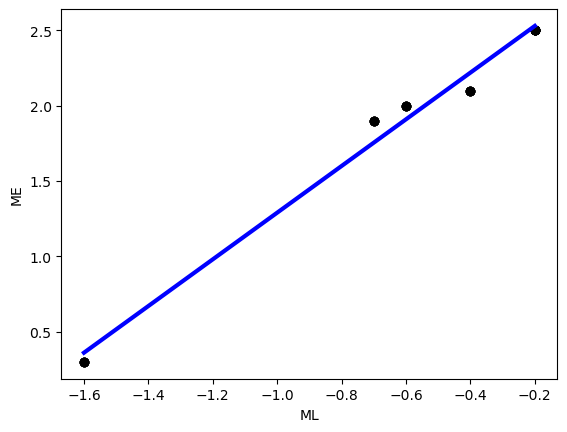

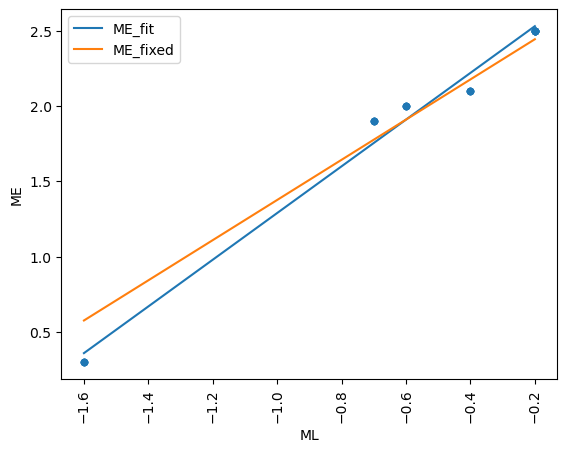


 Got 30 events
ML = 0.636 ME - 1.82
alt: ME = 1.57 ML + 2.85
R-squared value: 0.985
Mean squared error: 0.00
ML_fixed = 0.75 ME - 2.03
alt: ME = 1.33 ML_fixed + 2.71


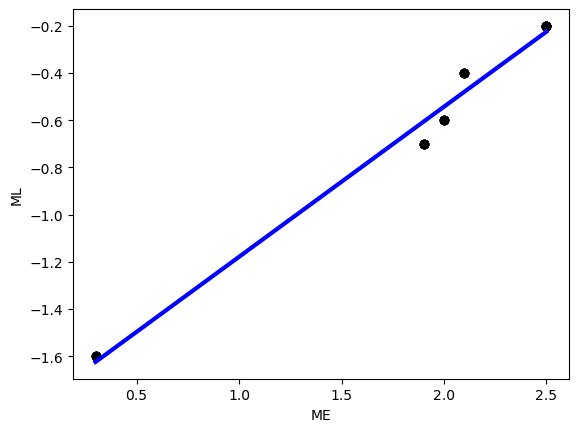

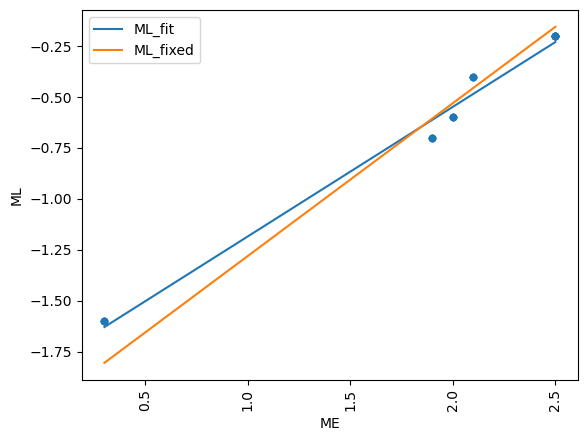

Event             start               end  \
0   e_2003-05-30T23:20:35.000000Z  2003-05-30 23:20  2003-05-30 23:22   
1   e_2003-05-30T23:20:35.000000Z  2003-05-30 23:20  2003-05-30 23:22   
2   e_2003-05-30T23:20:35.000000Z  2003-05-30 23:20  2003-05-30 23:22   
3   e_2003-05-30T23:20:35.000000Z  2003-05-30 23:20  2003-05-30 23:22   
4   e_2003-05-30T23:20:35.000000Z  2003-05-30 23:20  2003-05-30 23:22   
5   e_2003-01-29T12:13:23.000000Z  2003-01-29 12:13  2003-01-29 12:14   
6   e_2003-01-29T12:13:23.000000Z  2003-01-29 12:13  2003-01-29 12:14   
7   e_2003-01-29T12:13:23.000000Z  2003-01-29 12:13  2003-01-29 12:14   
8   e_2003-01-29T12:13:23.000000Z  2003-01-29 12:13  2003-01-29 12:14   
9   e_2003-01-29T12:13:23.000000Z  2003-01-29 12:13  2003-01-29 12:14   
10  e_2003-01-29T12:13:23.000000Z  2003-01-29 12:13  2003-01-29 12:14   
11  e_2003-05-24T00:53:40.000000Z  2003-05-24 00:53  2003-05-24 00:55   
12  e_2003-05-24T00:53:40.000000Z  2003-05-24 00:53  2003-05-24 00:55   
13  e_2003-05-24T00:53:40.000000Z  2003-05-24 00:53  2003-05-24 00:55   
14  e_2003-05-24T00:53:40.000000Z  2003-05-24 00:53  2003-05-24 00:55   
15  e_2003-05-24T00:53:40.000000Z  2003-05-24 00:53  2003-05-24 00:55   
16  e_2003-05-25T07:59:30.000000Z  2003-05-25 07:59  2003-05-25 08:01   
17  e_2003-05-30T03:03:39.000000Z  2003-05-30 03:03  2003-05-30 03:05   
18  e_2003-05-25T07:59:30.000000Z  2003-05-25 07:59  2003-05-25 08:01   
19  e_2003-05-30T03:03:39.000000Z  2003-05-30 03:03  2003-05-30 03:05   
20  e_2003-05-25T07:59:30.000000Z  2003-05-25 07:59  2003-05-25 08:01   
21  e_2003-05-30T03:03:39.000000Z  2003-05-30 03:03  2003-05-30 03:05   
22  e_2003-05-25T07:59:30.000000Z  2003-05-25 07:59  2003-05-25 08:01   
23  e_2003-05-30T03:03:39.000000Z  2003-05-30 03:03  2003-05-30 03:05   
24  e_2003-05-25T07:59:30.000000Z  2003-05-25 07:59  2003-05-25 08:01   
25  e_2003-05-30T03:03:39.000000Z  2003-05-30 03:03  2003-05-30 03:05   
26  e_2003-05-25T00:03:46.000000Z  2003-05-25 00:03  2003-05-25 00:05   
27  e_2003-05-25T00:03:46.000000Z  2003-05-25 00:03  2003-05-25 00:05   
28  e_2003-05-25T00:03:46.000000Z  2003-05-25 00:03  2003-05-25 00:05   
29  e_2003-05-25T00:03:46.000000Z  2003-05-25 00:03  2003-05-25 00:05   

    duration    ML       sum(ER)    ME     DR    DRS  
0      131.0  -0.5  1.100000e+08   2.2  200.0  100.0  
1      131.0  -0.5  1.100000e+08   2.2  200.0  100.0  
2      131.0  -0.5  1.100000e+08   2.2  200.0  100.0  
3      131.0  -0.5  1.100000e+08   2.2  200.0  100.0  
4      131.0  -0.5  1.100000e+08   2.2  200.0  100.0  
5       79.0 -21.1  1.100000e-34 -25.8    0.0    0.0  
6       79.0 -21.1  1.100000e-34 -25.8    0.0    0.0  
7       79.0 -21.1  1.100000e-34 -25.8    0.0    0.0  
8       79.0 -21.1  1.100000e-34 -25.8    0.0    0.0  
9       79.0 -21.1  1.100000e-34 -25.8    0.0    0.0  
10      79.0 -21.1  1.100000e-34 -25.8    0.0    0.0  
11     104.0  -1.2  7.600000e+06   1.4   41.0   20.0  
12     104.0  -1.2  7.600000e+06   1.4   41.0   20.0  
13     104.0  -1.2  7.600000e+06   1.4   41.0   20.0  
14     104.0  -1.2  7.600000e+06   1.4   41.0   20.0  
15     104.0  -1.2  7.600000e+06   1.4   41.0   20.0  
16      93.0  -1.1  9.600000e+06   1.4   54.0   26.0  
17      98.0  -0.9  1.000000e+07   1.5   66.0   32.0  
18      93.0  -1.1  9.600000e+06   1.4   54.0   26.0  
19      98.0  -0.9  1.000000e+07   1.5   66.0   32.0  
20      93.0  -1.1  9.600000e+06   1.4   54.0   26.0  
21      98.0  -0.9  1.000000e+07   1.5   66.0   32.0  
22      93.0  -1.1  9.600000e+06   1.4   54.0   26.0  
23      98.0  -0.9  1.000000e+07   1.5   66.0   32.0  
24      93.0  -1.1  9.600000e+06   1.4   54.0   26.0  
25      98.0  -0.9  1.000000e+07   1.5   66.0   32.0  
26      88.0  -1.1  7.200000e+06   1.4   55.0   27.0  
27      88.0  -1.1  7.200000e+06   1.4   55.0   27.0  
28      88.0  -1.1  7.200000e+06   1.4   55.0   27.0  
29      88.0  -1.1  7.200000e+06   1.4   55.0   27.0

              ML         ME
count  30.000000  30.000000
mean   -4.983333  -3.890000
std     8.199331  11.146001
min   -21.100000 -25.800000
25%    -1.200000   1.400000
50%    -1.100000   1.400000
75%    -0.900000   1.500000
max    -0.500000   2.200000

 Got 30 events
ME = 1.36 ML + 2.88
alt: ML = 0.736 ME - 2.12
R-squared value: 1.0
Mean squared error: 0.01
ME_fixed = 1.33 ML + 2.75
alt: ML = 0.75 ME_fixed - 2.06


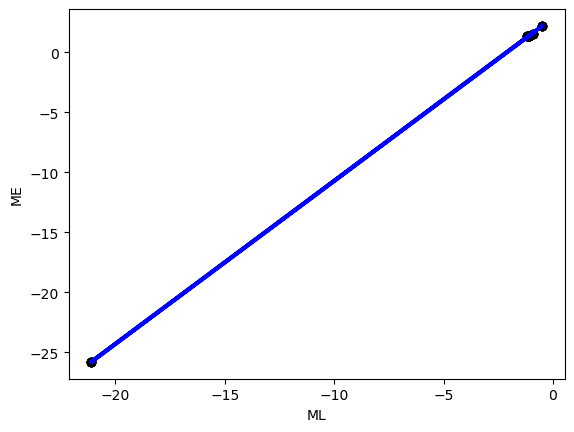

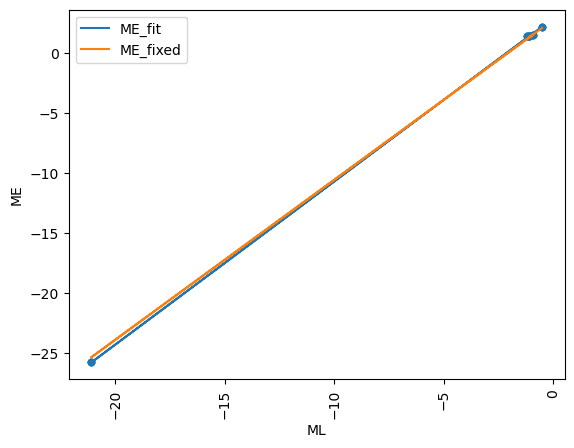


 Got 30 events
ML = 0.736 ME - 2.12
alt: ME = 1.36 ML + 2.88
R-squared value: 1.0
Mean squared error: 0.00
ML_fixed = 0.75 ME - 2.07
alt: ME = 1.33 ML_fixed + 2.76


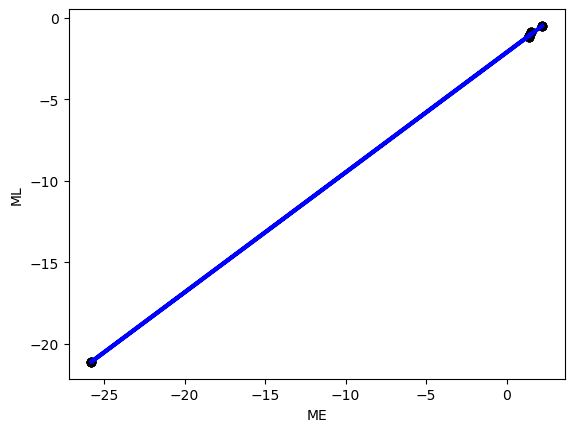

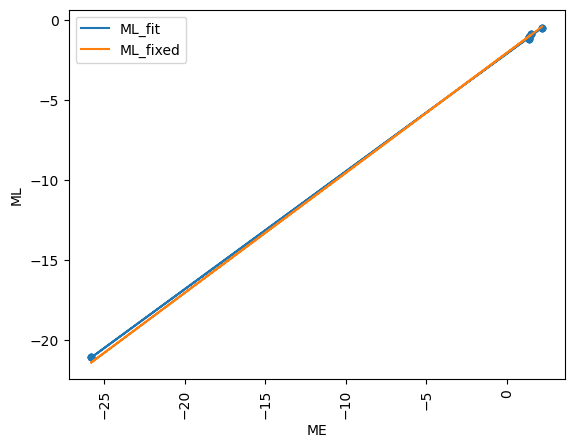

Event             start               end  \
0   l_2003-01-14T08:26:14.000000Z  2003-01-14 08:26  2003-01-14 08:28   
1   l_2003-01-14T08:26:14.000000Z  2003-01-14 08:26  2003-01-14 08:28   
2   l_2003-01-14T08:26:14.000000Z  2003-01-14 08:26  2003-01-14 08:28   
3   l_2003-01-14T08:26:14.000000Z  2003-01-14 08:26  2003-01-14 08:28   
4   l_2003-01-14T08:26:14.000000Z  2003-01-14 08:26  2003-01-14 08:28   
5   l_2003-01-14T08:26:14.000000Z  2003-01-14 08:26  2003-01-14 08:28   
6   l_2003-05-25T13:20:39.000000Z  2003-05-25 13:20  2003-05-25 13:22   
7   l_2003-05-25T13:20:39.000000Z  2003-05-25 13:20  2003-05-25 13:22   
8   l_2003-05-25T13:20:39.000000Z  2003-05-25 13:20  2003-05-25 13:22   
9   l_2003-05-25T13:20:39.000000Z  2003-05-25 13:20  2003-05-25 13:22   
10  l_2003-05-25T13:20:39.000000Z  2003-05-25 13:20  2003-05-25 13:22   
11  l_2003-05-15T10:54:41.000000Z  2003-05-15 10:54  2003-05-15 10:55   
12  l_2003-05-15T10:54:41.000000Z  2003-05-15 10:54  2003-05-15 10:55   
13  l_2003-05-15T10:54:41.000000Z  2003-05-15 10:54  2003-05-15 10:55   
14  l_2003-05-15T10:54:41.000000Z  2003-05-15 10:54  2003-05-15 10:55   
15  l_2003-05-15T10:54:41.000000Z  2003-05-15 10:54  2003-05-15 10:55   
16  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
17  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
18  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
19  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
20  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
21  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
22  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
23  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
24  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
25  l_2002-08-13T13:38:19.000000Z  2002-08-13 13:38  2002-08-13 13:39   
26  l_2002-08-13T10:51:24.000000Z  2002-08-13 10:51  2002-08-13 10:52   
27  l_2002-08-13T10:51:24.000000Z  2002-08-13 10:51  2002-08-13 10:52   
28  l_2002-08-13T10:51:24.000000Z  2002-08-13 10:51  2002-08-13 10:52   
29  l_2002-08-13T10:51:24.000000Z  2002-08-13 10:51  2002-08-13 10:52   

    duration   ML     sum(ER)   ME     DR    DRS  
0      127.0 -0.9  16000000.0  1.6   72.0   36.0  
1      127.0 -0.9  16000000.0  1.6   72.0   36.0  
2      127.0 -0.9  16000000.0  1.6   72.0   36.0  
3      127.0 -0.9  16000000.0  1.6   72.0   36.0  
4      127.0 -0.9  16000000.0  1.6   72.0   36.0  
5      127.0 -0.9  16000000.0  1.6   72.0   36.0  
6       83.0 -1.1   1800000.0  1.0   52.0   28.0  
7       83.0 -1.1   1800000.0  1.0   52.0   28.0  
8       83.0 -1.1   1800000.0  1.0   52.0   28.0  
9       83.0 -1.1   1800000.0  1.0   52.0   28.0  
10      83.0 -1.1   1800000.0  1.0   52.0   28.0  
11      57.0 -0.7  19000000.0  1.6  100.0   56.0  
12      57.0 -0.7  19000000.0  1.6  100.0   56.0  
13      57.0 -0.7  19000000.0  1.6  100.0   56.0  
14      57.0 -0.7  19000000.0  1.6  100.0   56.0  
15      57.0 -0.7  19000000.0  1.6  100.0   56.0  
16      80.0 -0.4  39000000.0  1.9  230.0  130.0  
17      80.0 -0.4  39000000.0  1.9  230.0  130.0  
18      80.0 -0.4  39000000.0  1.9  230.0  130.0  
19      80.0 -0.4  39000000.0  1.9  230.0  130.0  
20      80.0 -0.4  39000000.0  1.9  230.0  130.0  
21      80.0 -0.4  39000000.0  1.9  230.0  130.0  
22      80.0 -0.4  39000000.0  1.9  230.0  130.0  
23      80.0 -0.4  39000000.0  1.9  230.0  130.0  
24      80.0 -0.4  39000000.0  1.9  230.0  130.0  
25      80.0 -0.4  39000000.0  1.9  230.0  130.0  
26      81.0 -0.5  28000000.0  1.8  170.0   97.0  
27      81.0 -0.5  28000000.0  1.8  170.0   97.0  
28      81.0 -0.5  28000000.0  1.8  170.0   97.0  
29      81.0 -0.5  28000000.0  1.8  170.0   97.0

              ML         ME
count  30.000000  30.000000
mean   -0.680000   1.626667
std     0.268328   0.312866
min    -1.100000   1.000000
25%    -0.900000   1.600000
50%    -0.700000   1.600000
75%    -0.400000   1.900000
max    -0.400000   1.900000

 Got 30 events
ME = 1.07 ML + 2.36
alt: ML = 0.93 ME - 2.19
R-squared value: 0.85
Mean squared error: 0.01
ME_fixed = 1.33 ML + 2.53
alt: ML = 0.75 ME_fixed - 1.9


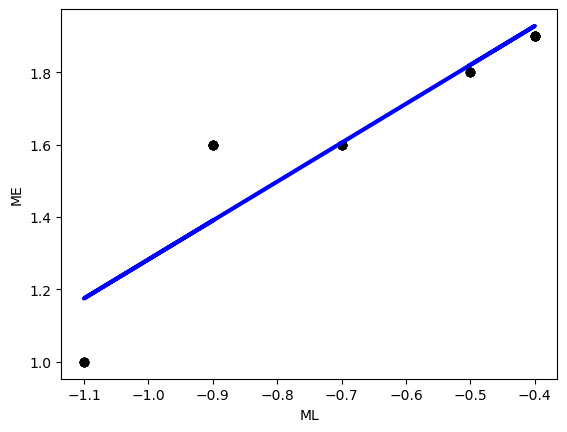

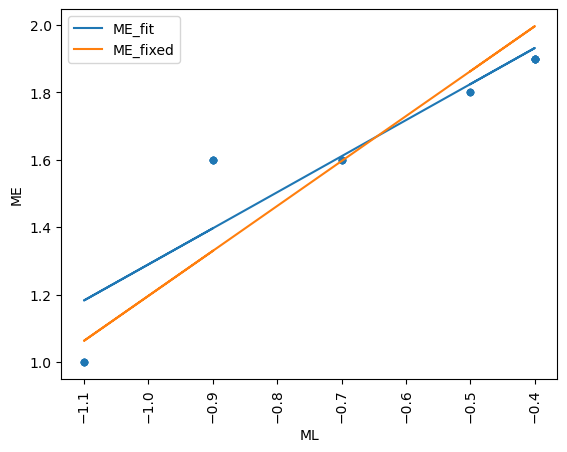


 Got 30 events
ML = 0.791 ME - 1.97
alt: ME = 1.27 ML + 2.49
R-squared value: 0.85
Mean squared error: 0.01
ML_fixed = 0.75 ME - 1.9
alt: ME = 1.33 ML_fixed + 2.53


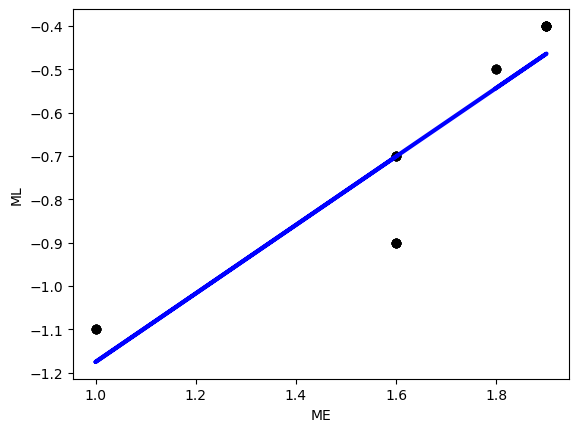

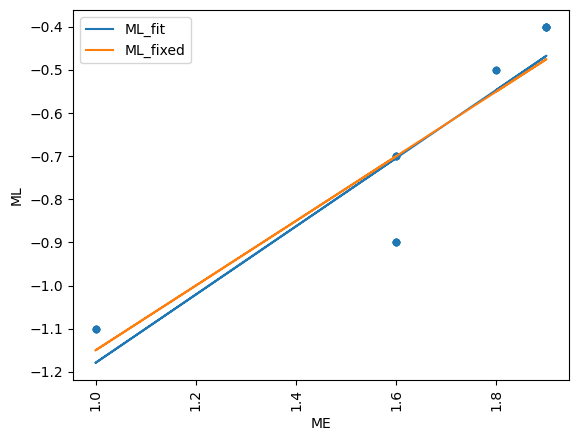

Event             start               end  \
0   h_1997-04-12T08:54:10.040000Z  1997-04-12 08:54  1997-04-12 08:54   
1   h_1998-10-25T07:57:09.040000Z  1998-10-25 07:57  1998-10-25 07:57   
2   h_1997-04-02T14:39:00.040000Z  1997-04-02 14:39  1997-04-02 14:39   
3   h_1997-04-04T01:26:23.040000Z  1997-04-04 01:26  1997-04-04 01:26   
4   h_1997-04-13T11:46:40.040000Z  1997-04-13 11:46  1997-04-13 11:47   
5   h_1997-04-15T06:52:46.040000Z  1997-04-15 06:52  1997-04-15 06:53   
6   h_1997-04-12T09:21:35.040000Z  1997-04-12 09:21  1997-04-12 09:22   
7   h_1997-04-15T08:42:25.040000Z  1997-04-15 08:42  1997-04-15 08:42   
8   h_1997-04-04T05:31:40.040000Z  1997-04-04 05:31  1997-04-04 05:32   
9   h_1997-04-04T02:24:58.040000Z  1997-04-04 02:24  1997-04-04 02:25   
10  h_1997-04-04T04:24:43.040000Z  1997-04-04 04:24  1997-04-04 04:26   
11  h_1997-04-04T03:14:30.040000Z  1997-04-04 03:14  1997-04-04 03:14   
12  h_1997-04-04T05:51:44.040000Z  1997-04-04 05:51  1997-04-04 05:52   
13  h_1997-04-12T10:04:43.040000Z  1997-04-12 10:04  1997-04-12 10:05   
14  h_1997-04-15T11:00:51.040000Z  1997-04-15 11:00  1997-04-15 11:01   
15  h_1997-04-15T10:25:16.040000Z  1997-04-15 10:25  1997-04-15 10:25   
16  h_1998-10-25T07:50:46.040000Z  1998-10-25 07:50  1998-10-25 07:51   
17  h_1997-04-15T09:31:29.040000Z  1997-04-15 09:31  1997-04-15 09:31   
18  h_1997-04-12T07:21:47.040000Z  1997-04-12 07:21  1997-04-12 07:22   
19  h_1997-04-12T15:58:08.040000Z  1997-04-12 15:58  1997-04-12 15:58   
20  h_1997-04-12T16:11:30.040000Z  1997-04-12 16:11  1997-04-12 16:11   
21  h_1997-04-04T00:11:27.040000Z  1997-04-04 00:11  1997-04-04 00:11   
22  h_2001-03-01T14:21:48.040000Z  2001-03-01 14:21  2001-03-01 14:22   
23  h_1997-04-13T10:33:33.040000Z  1997-04-13 10:33  1997-04-13 10:34   
24  h_1997-04-12T11:38:48.040000Z  1997-04-12 11:38  1997-04-12 11:39   
25  h_1997-04-12T10:29:27.040000Z  1997-04-12 10:29  1997-04-12 10:29   
26  h_1997-04-16T10:07:47.040000Z  1997-04-16 10:07  1997-04-16 10:08   
27  h_1997-04-03T23:33:09.040000Z  1997-04-03 23:33  1997-04-03 23:33   
28  h_1997-04-12T07:23:49.040000Z  1997-04-12 07:23  1997-04-12 07:24   
29  h_1997-04-12T07:33:20.040000Z  1997-04-12 07:33  1997-04-12 07:33   

    duration   ML      sum(ER)   ME      DR     DRS  
0       28.0  0.3  740000000.0  2.7  1200.0   690.0  
1       30.0 -0.1  110000000.0  2.2   570.0   390.0  
2       31.0 -1.3     920000.0  0.8    35.0    17.0  
3       28.0  0.2  620000000.0  2.7  1100.0   640.0  
4       28.0  0.2  630000000.0  2.7  1700.0  1000.0  
5       28.0  0.3  590000000.0  2.6  1100.0   690.0  
6       29.0 -1.5    1100000.0  0.8    22.0    10.0  
7       31.0  0.2  490000000.0  2.6  1600.0   980.0  
8       29.0  0.0  340000000.0  2.5   760.0   430.0  
9       28.0  0.0  310000000.0  2.5   730.0   430.0  
10      99.0 -0.0  260000000.0  2.4   710.0   410.0  
11      28.0 -0.2   58000000.0  2.0   300.0   180.0  
12      31.0 -1.0    5600000.0  1.3    55.0    27.0  
13      30.0 -0.6   12000000.0  1.5   140.0    73.0  
14      28.0 -1.2    2700000.0  1.1    43.0    22.0  
15      34.0 -1.0    3000000.0  1.1    59.0    30.0  
16      29.0 -0.8    7600000.0  1.4   110.0    59.0  
17      28.0 -1.2    2100000.0  1.0    46.0    23.0  
18      30.0 -0.8    8800000.0  1.4   110.0    54.0  
19      32.0 -0.6    8700000.0  1.4   130.0    75.0  
20      28.0 -0.8    8800000.0  1.4    79.0    42.0  
21      33.0 -1.2    1900000.0  1.0    49.0    23.0  
22      33.0 -0.6   25000000.0  1.7   110.0    59.0  
23      54.0 -0.8    7200000.0  1.4    94.0    48.0  
24      30.0 -1.2    1100000.0  0.8    38.0    19.0  
25      28.0 -2.5       2400.0 -1.0     1.8     1.1  
26      31.0 -1.4    1300000.0  0.9    26.0    12.0  
27      31.0 -1.4    1000000.0  0.8    32.0    15.0  
28      31.0 -1.3    1200000.0  0.8    35.0    16.0  
29      30.0 -1.2     770000.0  0.7    31.0    15.0

              ML         ME
count  30.000000  30.000000
mean   -0.716667   1.506667
std     0.684349   0.849719
min    -2.500000  -1.000000
25%    -1.200000   0.925000
50%    -0.800000   1.400000
75%    -0.025000   2.350000
max     0.300000   2.700000

 Got 30 events
ME = 1.23 ML + 2.38
alt: ML = 0.816 ME - 1.95
R-squared value: 0.974
Mean squared error: 0.02
ME_fixed = 1.33 ML + 2.46
alt: ML = 0.75 ME_fixed - 1.84


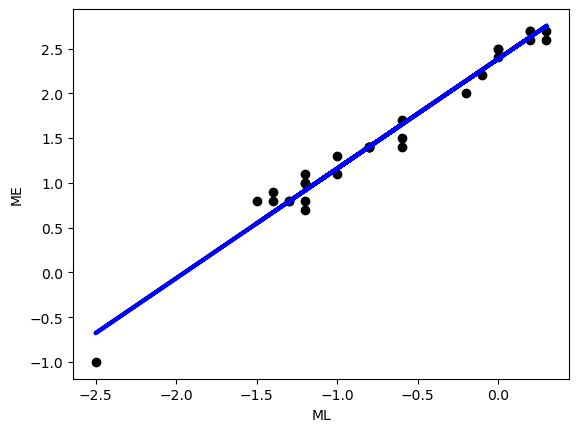

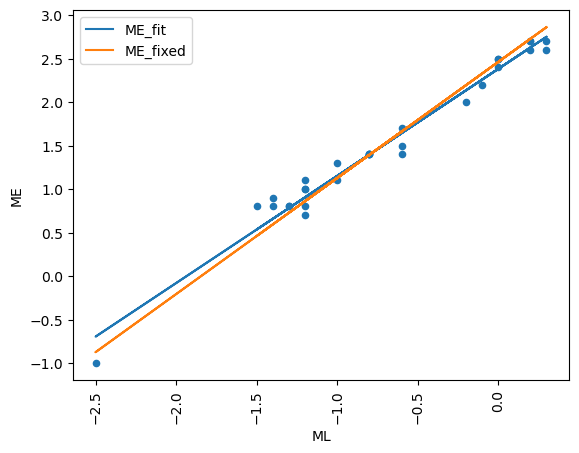


 Got 30 events
ML = 0.795 ME - 1.91
alt: ME = 1.26 ML + 2.41
R-squared value: 0.974
Mean squared error: 0.01
ML_fixed = 0.75 ME - 1.85
alt: ME = 1.33 ML_fixed + 2.47


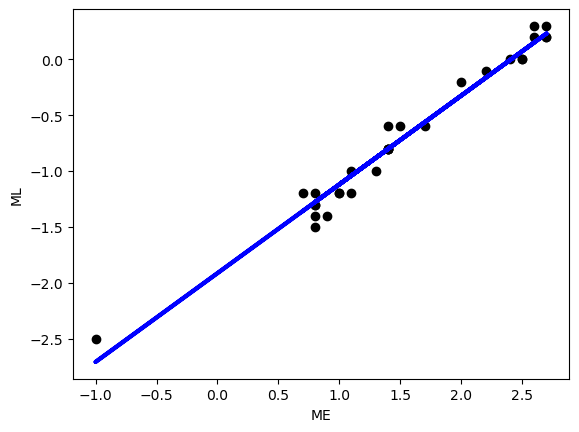

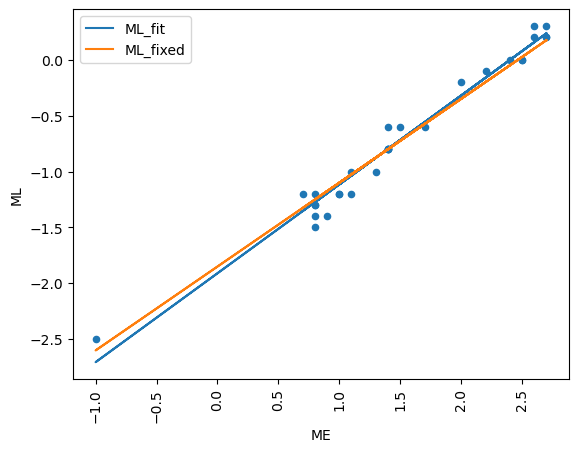

Event             start               end  \
0   t_1998-10-18T13:16:05.040000Z  1998-10-18 13:16  1998-10-18 13:17   
1   t_1998-10-18T15:25:57.040000Z  1998-10-18 15:25  1998-10-18 15:26   
2   t_1998-10-11T14:28:16.040000Z  1998-10-11 14:28  1998-10-11 14:29   
3   t_1998-10-18T15:12:06.040000Z  1998-10-18 15:12  1998-10-18 15:12   
4   t_1998-10-18T15:01:42.040000Z  1998-10-18 15:01  1998-10-18 15:02   
5   t_1998-10-18T15:29:01.040000Z  1998-10-18 15:29  1998-10-18 15:29   
6   t_1998-10-18T14:06:42.040000Z  1998-10-18 14:06  1998-10-18 14:07   
7   t_1997-04-08T15:28:49.040000Z  1997-04-08 15:28  1997-04-08 15:29   
8   t_1997-04-13T02:46:24.040000Z  1997-04-13 02:46  1997-04-13 02:47   
9   t_1998-10-31T15:43:00.040000Z  1998-10-31 15:43  1998-10-31 15:43   
10  t_1998-04-26T14:48:16.040000Z  1998-04-26 14:48  1998-04-26 14:48   
11  t_1998-04-18T01:20:05.040000Z  1998-04-18 01:20  1998-04-18 01:20   
12  t_1997-04-03T14:44:53.040000Z  1997-04-03 14:44  1997-04-03 14:45   
13  t_1997-04-05T14:22:32.040000Z  1997-04-05 14:22  1997-04-05 14:23   
14  t_1998-04-03T17:58:38.040000Z  1998-04-03 17:58  1998-04-03 17:58   
15  t_1998-10-29T19:46:16.040000Z  1998-10-29 19:46  1998-10-29 19:48   
16  t_1997-04-21T03:27:30.040000Z  1997-04-21 03:27  1997-04-21 03:28   
17  t_1997-04-07T05:25:30.040000Z  1997-04-07 05:25  1997-04-07 05:25   
18  t_2001-03-01T21:37:46.040000Z  2001-03-01 21:37  2001-03-01 21:38   
19  t_1998-04-19T21:24:15.040000Z  1998-04-19 21:24  1998-04-19 21:24   

    duration   ML      sum(ER)   ME      DR      DRS  
0       61.0  0.5  900000000.0  2.8  2000.0  1000.00  
1       34.0 -2.3      11000.0 -0.5     2.8     1.50  
2       49.0 -1.2     990000.0  0.8    34.0    17.00  
3       25.0 -0.8    7300000.0  1.4    88.0    41.00  
4       22.0 -0.7   43000000.0  1.9   120.0    47.00  
5       24.0 -1.0    5200000.0  1.3    48.0    22.00  
6       24.0 -1.2    2600000.0  1.1    37.0    15.00  
7       28.0 -1.6     920000.0  0.8    17.0     7.10  
8       43.0 -1.1    4800000.0  1.2    45.0    18.00  
9       32.0 -1.8     250000.0  0.4    12.0     5.40  
10      27.0 -1.1    4800000.0  1.2    47.0    19.00  
11      29.0 -1.5     790000.0  0.7    21.0     9.60  
12      31.0 -1.7     230000.0  0.4    12.0     5.20  
13      38.0 -1.4    1100000.0  0.8    21.0     8.90  
14      20.0 -2.2      44000.0 -0.1     4.2     1.90  
15     126.0 -1.3     540000.0  0.6    26.0    13.00  
16      36.0 -2.6       9700.0 -0.5     1.9     0.93  
17      27.0 -2.0     100000.0  0.1     7.7     3.30  
18      25.0 -1.4    2300000.0  1.0    25.0     8.60  
19      25.0 -1.7     230000.0  0.4    13.0     5.30

              ML         ME
count  20.000000  20.000000
mean   -1.405000   0.790000
std     0.670016   0.777242
min    -2.600000  -0.500000
25%    -1.725000   0.400000
50%    -1.400000   0.800000
75%    -1.100000   1.200000
max     0.500000   2.800000

 Got 20 events
ME = 1.14 ML + 2.39
alt: ML = 0.88 ME - 2.1
R-squared value: 0.959
Mean squared error: 0.02
ME_fixed = 1.33 ML + 2.66
alt: ML = 0.75 ME_fixed - 2.0


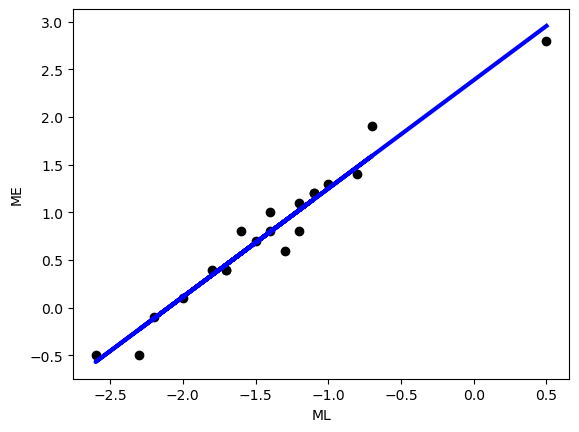

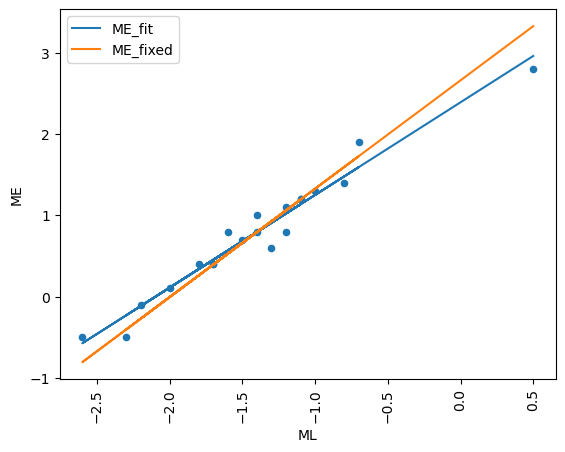


 Got 20 events
ML = 0.844 ME - 2.07
alt: ME = 1.18 ML + 2.45
R-squared value: 0.959
Mean squared error: 0.02
ML_fixed = 0.75 ME - 2.0
alt: ME = 1.33 ML_fixed + 2.67


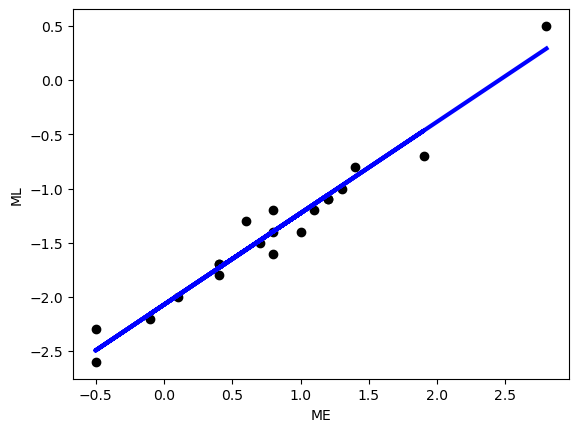

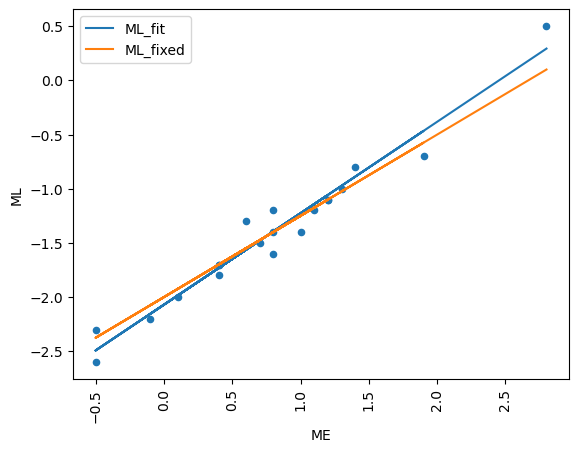

In [4]:
for subclass in subclasses:
    display(catResultsDF[subclass])
    print(catResultsDF[subclass][['ML', 'ME']].describe())
    DFT.fix_slope(catResultsDF[subclass], 'ML', 'ME', mfixed=4/3, cfixed=None, plot=True, print_stats=True)
    DFT.fix_slope(catResultsDF[subclass], 'ME', 'ML', mfixed=3/4, cfixed=None, plot=True, print_stats=True)